In [145]:
#installing seaborn
!pip install seaborn
!pip install statsmodels

In [146]:
#importing libraries and reading the datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import warnings
import itertools
from math import sqrt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split




# Suppress warnings to keep output clean
warnings.filterwarnings("ignore")

In [147]:
# Load datasets
df_clicks = pd.read_csv('clicks.csv')         # Contains columns like 'Day Index', 'clicks'
df_impressions = pd.read_csv('impressions.csv')  # Contains columns like 'Day Index', 'impressions'
df_product = pd.read_csv('product.csv')       # Contains columns like 'Day Index', 'product'

In [148]:
#printing the first 5 records
df_clicks.head()

,Day Index,Clicks
0,01-12-2021,445
1,02-12-2021,433
2,03-12-2021,424
3,04-12-2021,427
4,05-12-2021,451


In [149]:
#printing the first 5 records
df_impressions.head()

,Day Index,Impressions
0,01-12-2021,620
1,02-12-2021,890
2,03-12-2021,851
3,04-12-2021,881
4,05-12-2021,678


In [150]:
#printing the first 5 records
df_product.head()

,Day Index,Quantity
0,01-12-2021,14
1,02-12-2021,10
2,03-12-2021,13
3,04-12-2021,22
4,05-12-2021,33


In [151]:
# First merge clicks and impressions on 'date'
merged_df = pd.merge(df_clicks, df_impressions, on='Day Index', how='left')

# Then merge the result with product on 'date'
final_df = pd.merge(merged_df, df_product, on='Day Index', how='left')
final_copy=final_df.copy()


In [152]:
#printing the first 5 records of the merged dataset
print(final_df.head())

    Day Index  Clicks  Impressions  Quantity
0  01-12-2021     445          620        14
1  02-12-2021     433          890        10
2  03-12-2021     424          851        13
3  04-12-2021     427          881        22
4  05-12-2021     451          678        33


In [153]:
#info of dataset
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Day Index    212 non-null    object
 1   Clicks       212 non-null    int64 
 2   Impressions  212 non-null    int64 
 3   Quantity     212 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.8+ KB


In [154]:
#shape of dataset
final_df.shape

(212, 4)

In [155]:
#datatypes of dataset
final_df.dtypes

Day Index      object
Clicks          int64
Impressions     int64
Quantity        int64
dtype: object

In [156]:
# Convert 'Day Index' column to datetime format by specifying the format
final_df['Day Index'] = pd.to_datetime(final_df['Day Index'], format="%d-%m-%Y")
# Check the data types to confirm the conversion
print(final_df.dtypes)
print(final_df.head())

Day Index      datetime64[ns]
Clicks                  int64
Impressions             int64
Quantity                int64
dtype: object
   Day Index  Clicks  Impressions  Quantity
0 2021-12-01     445          620        14
1 2021-12-02     433          890        10
2 2021-12-03     424          851        13
3 2021-12-04     427          881        22
4 2021-12-05     451          678        33


In [157]:
#check for null values
final_df.isnull().sum()

Day Index      0
Clicks         0
Impressions    0
Quantity       0
dtype: int64

In [158]:
#describing data
final_df.describe()

,Day Index,Clicks,Impressions,Quantity
count,212,212.00000,212.000000,212.000000
mean,2022-03-16 12:00:00,358.20283,1531.702830,17.542453
min,2021-12-01 00:00:00,60.00000,620.000000,5.000000
25%,2022-01-22 18:00:00,154.00000,1209.750000,13.750000
50%,2022-03-16 12:00:00,402.50000,1460.000000,17.000000
75%,2022-05-08 06:00:00,492.75000,1862.000000,21.000000
max,2022-06-30 00:00:00,726.00000,2707.000000,38.000000
std,NaN,164.52160,440.660783,5.790423


In [159]:
#printing to see the data
print(final_df.columns)
print(final_df.head())
final_df.dtypes

Index(['Day Index', 'Clicks', 'Impressions', 'Quantity'], dtype='object')
   Day Index  Clicks  Impressions  Quantity
0 2021-12-01     445          620        14
1 2021-12-02     433          890        10
2 2021-12-03     424          851        13
3 2021-12-04     427          881        22
4 2021-12-05     451          678        33


Day Index      datetime64[ns]
Clicks                  int64
Impressions             int64
Quantity                int64
dtype: object

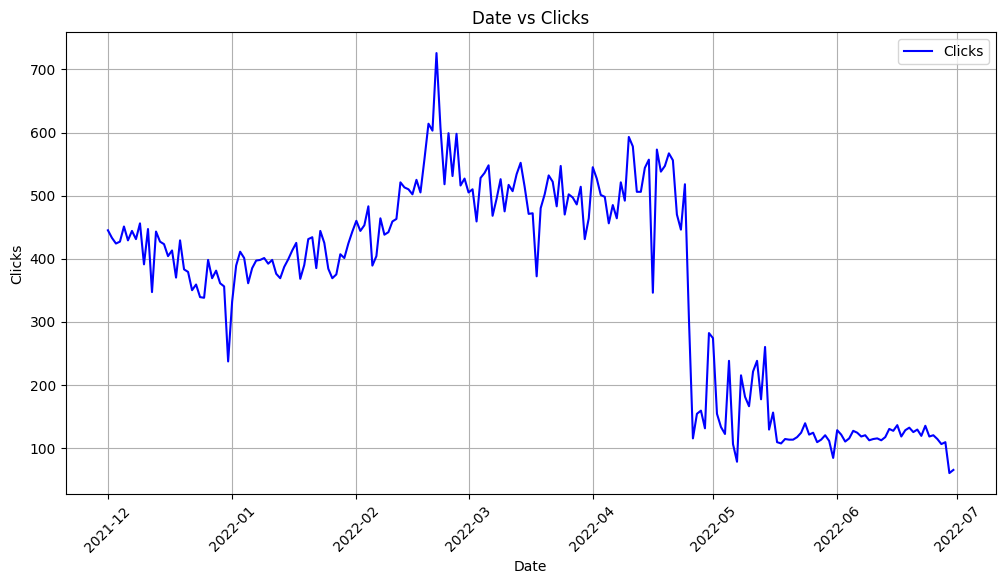

In [160]:
# Plot Day Index vs Clicks
plt.figure(figsize=(12, 6))
plt.plot(final_df['Day Index'], final_df['Clicks'], label='Clicks', color='blue')
plt.xlabel('Date')
plt.ylabel('Clicks')
plt.title('Date vs Clicks')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

#### This graph shows spike in clicks in feb-march and declined in may

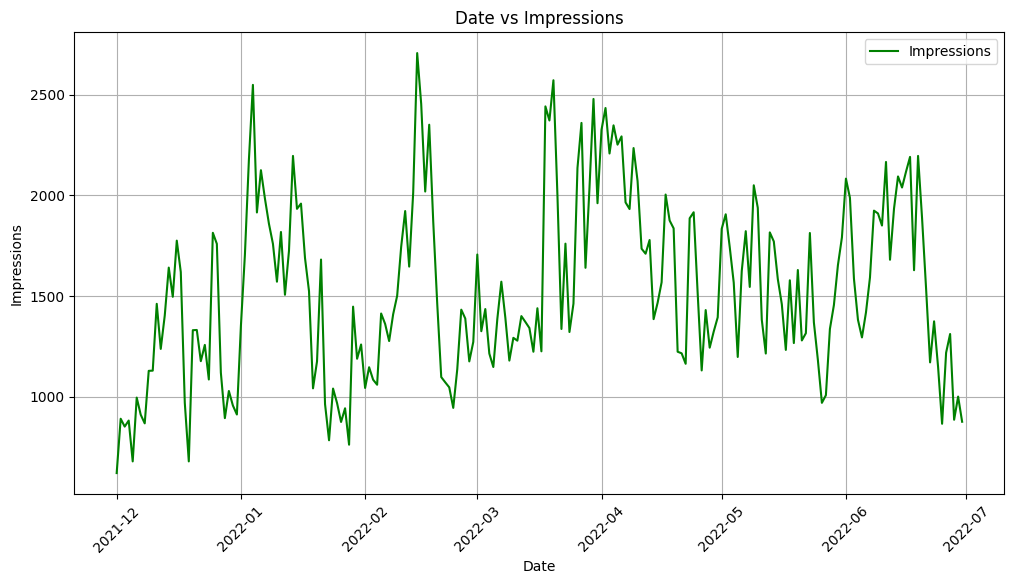

In [161]:
# Plot Day Index vs Impressions
plt.figure(figsize=(12, 6))
plt.plot(final_df['Day Index'], final_df['Impressions'], label='Impressions', color='green')
plt.xlabel('Date')
plt.ylabel('Impressions')
plt.title('Date vs Impressions')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

#### This graph shows spike and decline till may

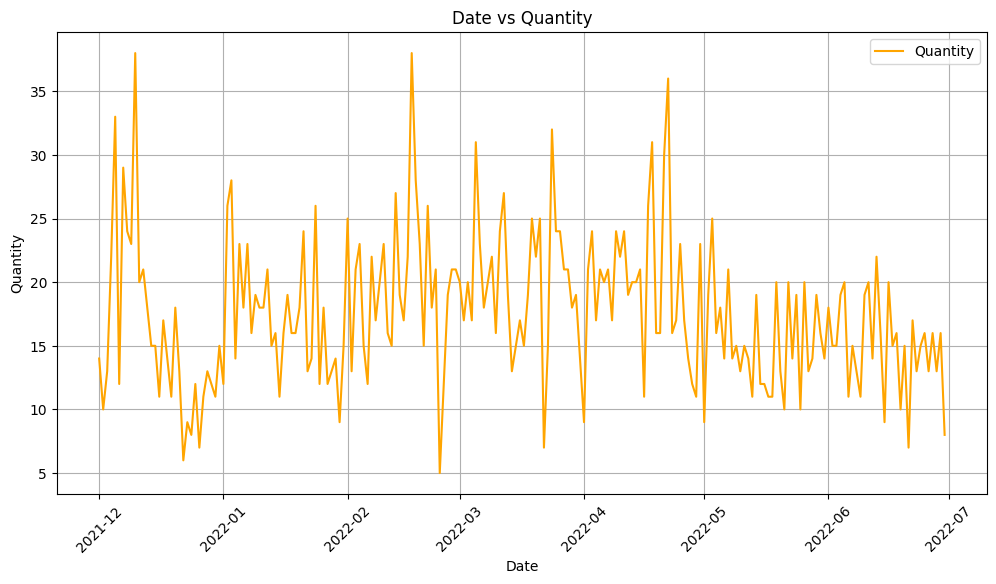

In [162]:
# Plot Day Index vs Quantity
plt.figure(figsize=(12, 6))
plt.plot(final_df['Day Index'], final_df['Quantity'], label='Quantity', color='orange')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Date vs Quantity')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

#### The quantity raised in mid feb and declined in march  

### Weekly plots for clicks, impressions and quantity

In [163]:
# Aggregate the data weekly
weekly_df = final_df.resample('W', on='Day Index').sum()

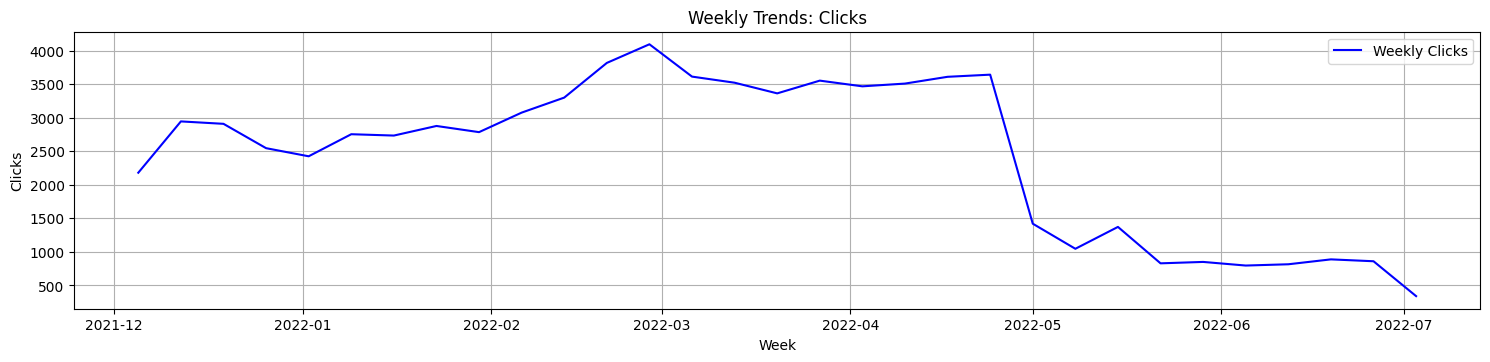

In [164]:
# Plot Weekly Trends for All Columns
plt.figure(figsize=(15, 10))

# Weekly Clicks
plt.subplot(3, 1, 1)
plt.plot(weekly_df.index, weekly_df['Clicks'], label='Weekly Clicks', color='blue')
plt.title('Weekly Trends: Clicks')
plt.xlabel('Week')
plt.ylabel('Clicks')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

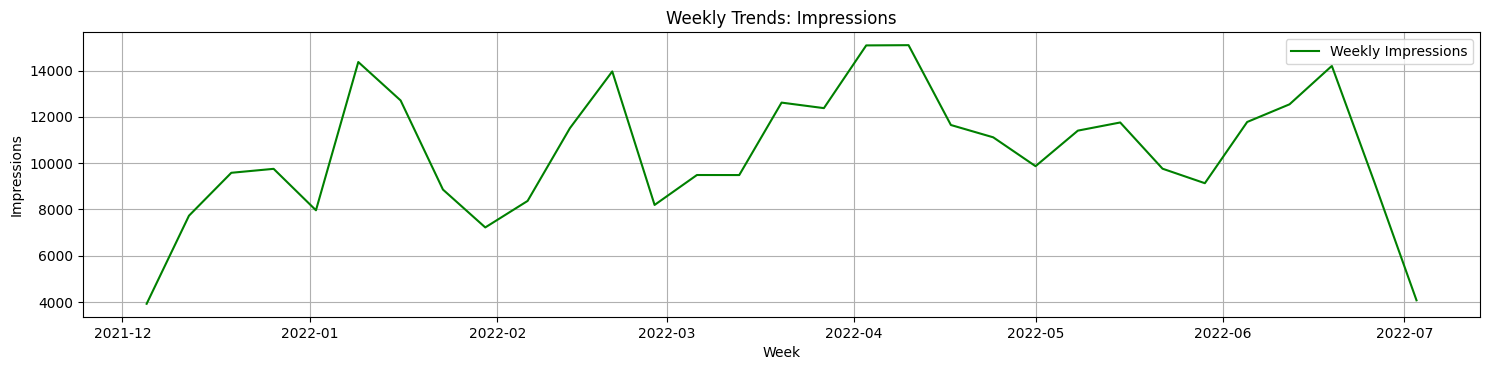

In [165]:
# Weekly Impressions 
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 2)
plt.plot(weekly_df.index, weekly_df['Impressions'], label='Weekly Impressions', color='green')
plt.title('Weekly Trends: Impressions')
plt.xlabel('Week')
plt.ylabel('Impressions')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

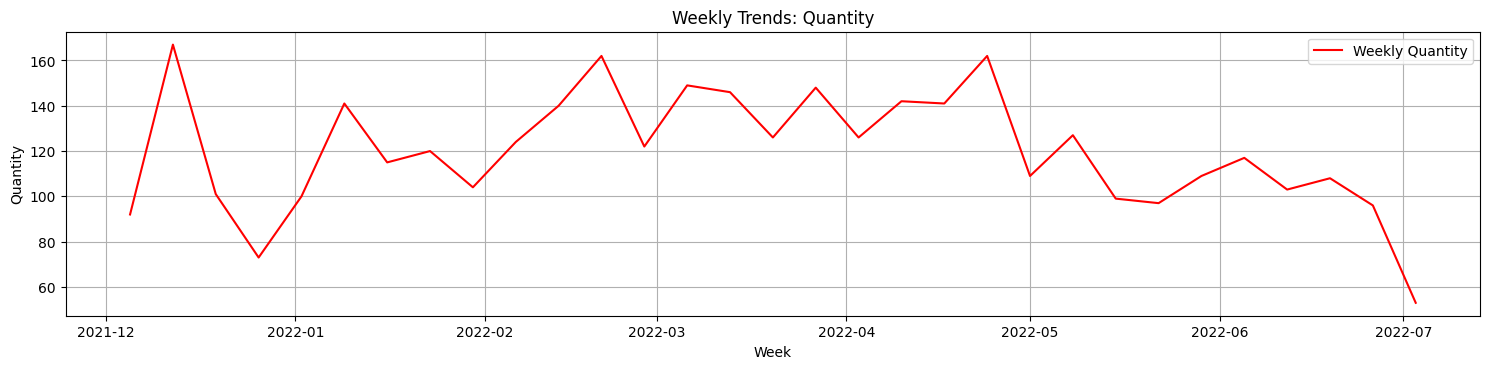

In [166]:
# Weekly Quantity
plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 3)
plt.plot(weekly_df.index, weekly_df['Quantity'], label='Weekly Quantity', color='red')
plt.title('Weekly Trends: Quantity')
plt.xlabel('Week')
plt.ylabel('Quantity')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

#### These are the weekly trends for quantity which increased during mid december and declined from may

### Monthly plots

In [167]:
# Aggregate the data monthly
monthly_df = final_df.resample('M', on='Day Index').sum()


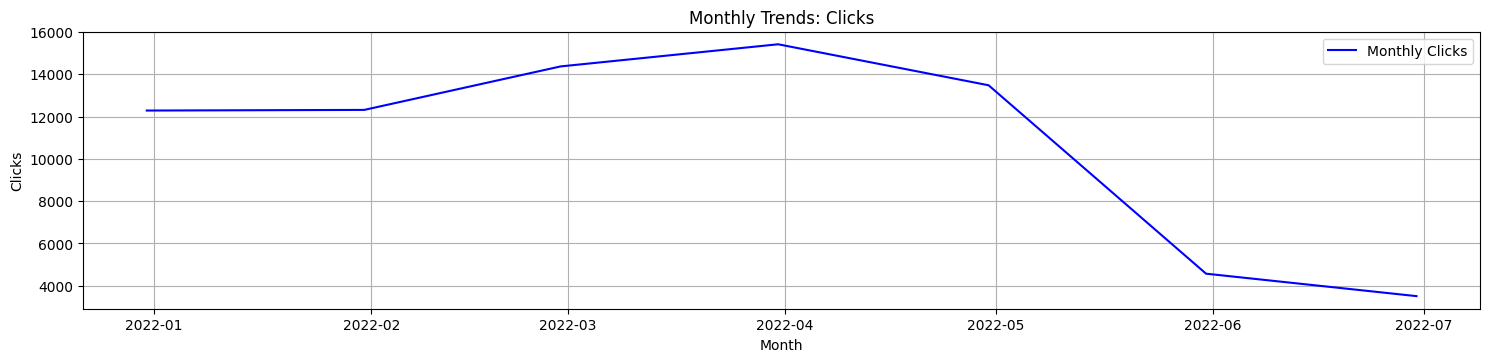

In [168]:
# Plot Monthly Trends for All Columns
plt.figure(figsize=(15, 10))

# Monthly Clicks
plt.subplot(3, 1, 1)
plt.plot(monthly_df.index, monthly_df['Clicks'], label='Monthly Clicks', color='blue')
plt.title('Monthly Trends: Clicks')
plt.xlabel('Month')
plt.ylabel('Clicks')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

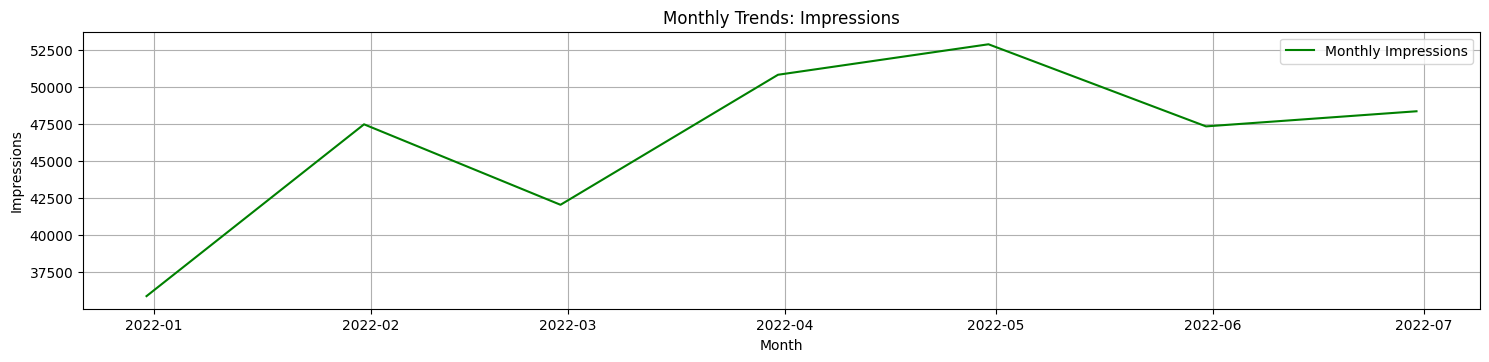

In [169]:
# Monthly Impressions
plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
plt.plot(monthly_df.index, monthly_df['Impressions'], label='Monthly Impressions', color='green')
plt.title('Monthly Trends: Impressions')
plt.xlabel('Month')
plt.ylabel('Impressions')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

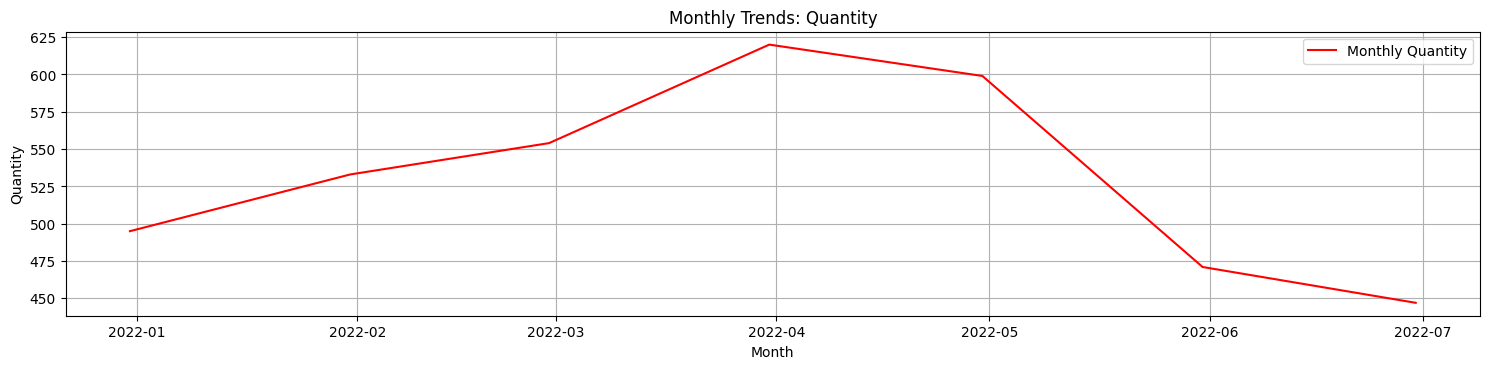

In [170]:
# Monthly Quantity
plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 3)
plt.plot(monthly_df.index, monthly_df['Quantity'], label='Monthly Quantity', color='red')
plt.title('Monthly Trends: Quantity')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

#### These are the monthly trends for quantity which increased during april and declined from may

### Checking outliers

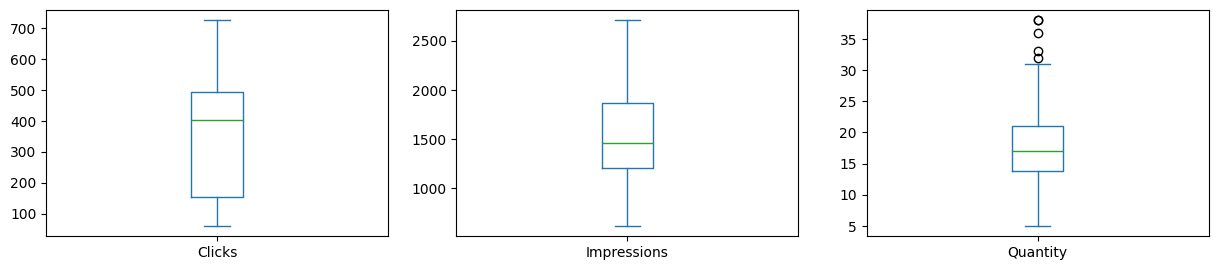

In [171]:
#box plots of the columns in the dataset
final_df.plot(kind='box', subplots=True, layout=(3, 3), figsize=(15, 10), sharex=False, sharey=False)
plt.show()

#### Quantity has outliers and should be treated so that the processing and model is free from outliers

### Outlier Detection and Treatment

In [172]:
# Define the function to count outliers
def count_outliers(column):
    Q1 = column.quantile(0.25)  # First quartile (25th percentile)
    Q3 = column.quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1              # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Count outliers below the lower bound or above the upper bound
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return len(outliers)

# Step 2: Apply the function to numeric columns in the DataFrame
numeric_columns = final_df.select_dtypes(include=['number'])
outlier_counts = numeric_columns.apply(count_outliers)

# Display the result
print("Number of outliers in each column:")
print(outlier_counts)

Number of outliers in each column:
Clicks         0
Impressions    0
Quantity       5
dtype: int64


#### Quantity has 5 outlier values

In [173]:
#Copy the data for comparison
df_before_outlier_treatment = final_df.copy()

In [174]:
# Step 1: Treat outliers for 'Quantity' column
Q1 = final_df['Quantity'].quantile(0.25)
Q3 = final_df['Quantity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers in 'Quantity' with boundary values
final_df['Quantity'] = np.where(
    final_df['Quantity'] < lower_bound, lower_bound,
    np.where(final_df['Quantity'] > upper_bound, upper_bound, final_df['Quantity'])
)

# Step 2: Recheck the outliers in the updated DataFrame
def count_outliers_updated(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Count outliers below the lower bound or above the upper bound
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return len(outliers)

# Apply the function again after treatment
numeric_columns_updated = final_df.select_dtypes(include=['number'])
outlier_counts_after_treatment = numeric_columns_updated.apply(count_outliers_updated)

# Display results
print("\nNumber of outliers after treatment:")
print(outlier_counts_after_treatment)



Number of outliers after treatment:
Clicks         0
Impressions    0
Quantity       0
dtype: int64


#### We have cleaned the dataset now and it is ready to be processed so that our predictions are free from outliers

In [175]:
outlier_counts_after_treatment.head()

Clicks         0
Impressions    0
Quantity       0
dtype: int64

In [176]:
final_df.head()

,Day Index,Clicks,Impressions,Quantity
0,2021-12-01,445,620,14.000
1,2021-12-02,433,890,10.000
2,2021-12-03,424,851,13.000
3,2021-12-04,427,881,22.000
4,2021-12-05,451,678,31.875


In [177]:
print("Original DataFrame:")
print(df_before_outlier_treatment)
print("\nDataFrame after removing outliers:")
print(final_df)

Original DataFrame:
     Day Index  Clicks  Impressions  Quantity
0   2021-12-01     445          620        14
1   2021-12-02     433          890        10
2   2021-12-03     424          851        13
3   2021-12-04     427          881        22
4   2021-12-05     451          678        33
..         ...     ...          ...       ...
207 2022-06-26     114         1218        13
208 2022-06-27     106         1311        16
209 2022-06-28     109          885        13
210 2022-06-29      60         1000        16
211 2022-06-30      65          875         8

[212 rows x 4 columns]

DataFrame after removing outliers:
     Day Index  Clicks  Impressions  Quantity
0   2021-12-01     445          620    14.000
1   2021-12-02     433          890    10.000
2   2021-12-03     424          851    13.000
3   2021-12-04     427          881    22.000
4   2021-12-05     451          678    31.875
..         ...     ...          ...       ...
207 2022-06-26     114         1218    13.000


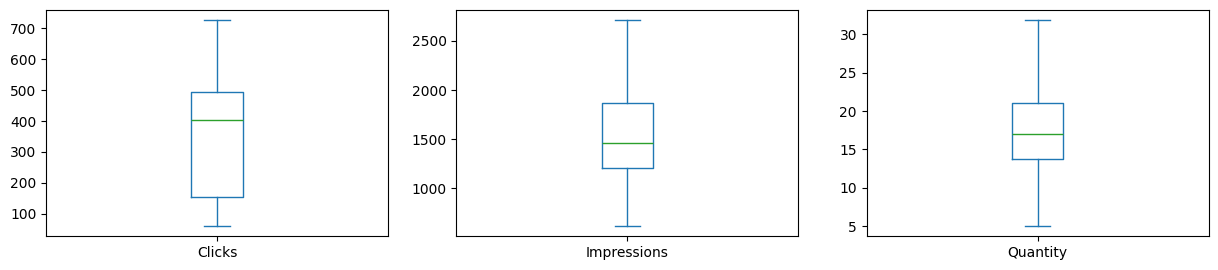

In [178]:
#box plots of the columns in the dataset
final_df.plot(kind='box', subplots=True, layout=(3, 3), figsize=(15, 10), sharex=False, sharey=False)
plt.title('Box Plot of Cleaned Dataset (After Outlier Treatment)', fontsize=14)
plt.show()

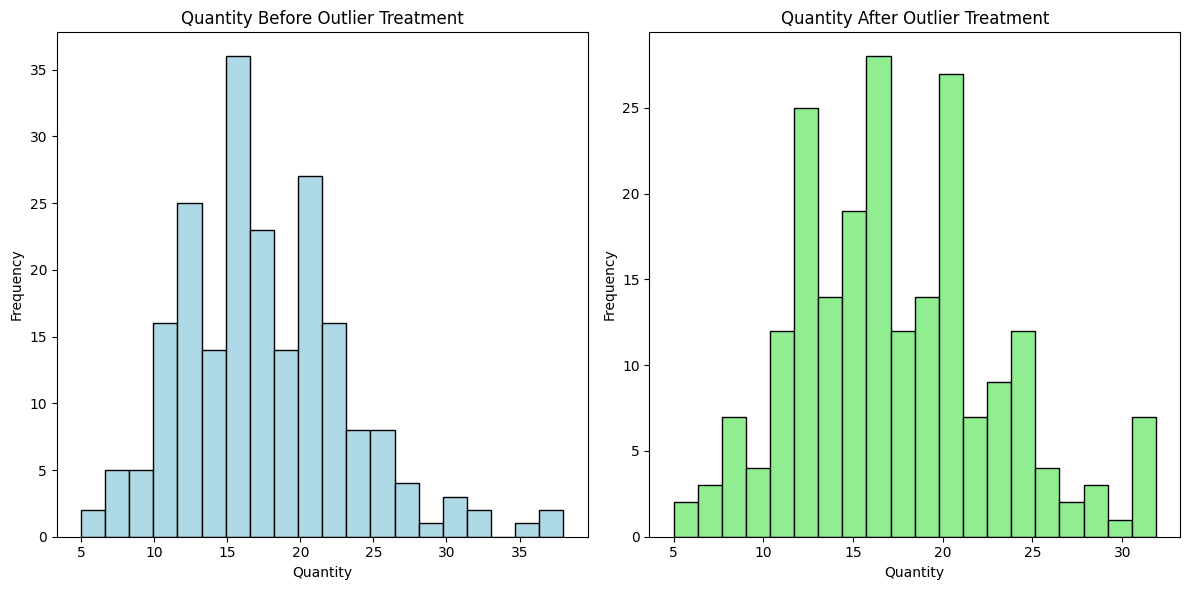

In [179]:
# Step 1: Plot histogram for 'Quantity' before outlier treatment
plt.figure(figsize=(12, 6))

# Plot histogram for Quantity before treatment (using 'old_df' which contains the data before outlier treatment)
plt.subplot(1, 2, 1)  # Create a subplot (1 row, 2 columns)
plt.hist(df_before_outlier_treatment['Quantity'], bins=20, color='lightblue', edgecolor='black')
plt.title('Quantity Before Outlier Treatment')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

# Step 2: Plot histogram for 'Quantity' after outlier treatment
plt.subplot(1, 2, 2)  # Create a subplot (1 row, 2 columns)
plt.hist(final_df['Quantity'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Quantity After Outlier Treatment')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()


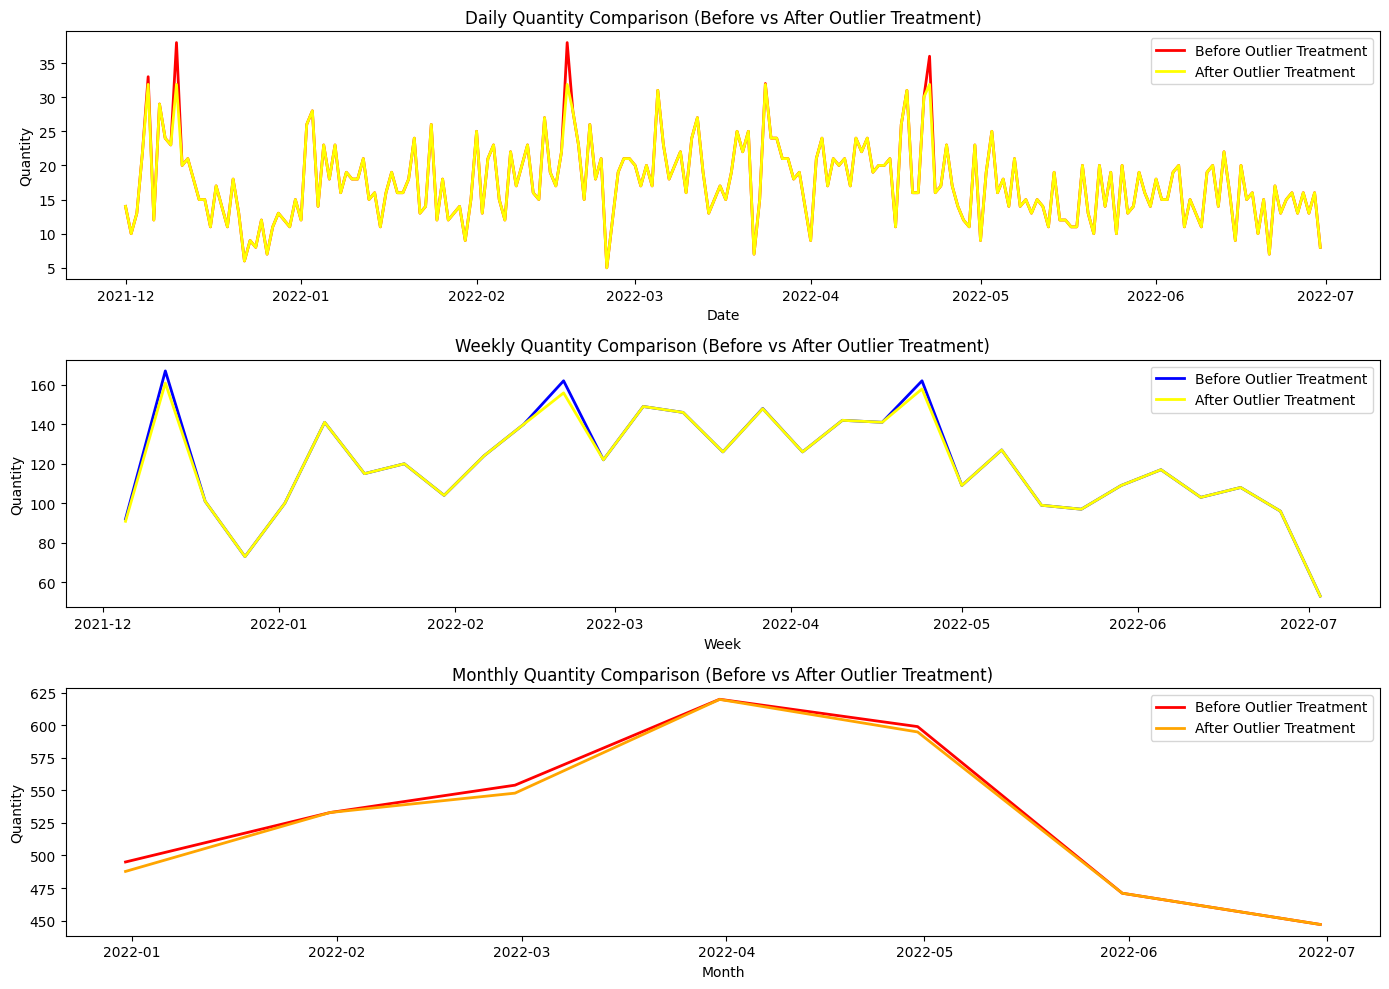

In [180]:
# Assuming final_df_before and final_df_after are your datasets before and after outlier treatment

# Ensure 'Day Index' is in datetime format for both datasets
df_before_outlier_treatment['Day Index'] = pd.to_datetime(df_before_outlier_treatment['Day Index'])
final_df['Day Index'] = pd.to_datetime(final_df['Day Index'])

# Step 1: Aggregate by Day, Week, and Month for 'Quantity' before and after outlier treatment
daily_quantity_before = df_before_outlier_treatment.groupby('Day Index')['Quantity'].sum()
weekly_quantity_before = df_before_outlier_treatment.resample('W', on='Day Index')['Quantity'].sum()  # Weekly sum
monthly_quantity_before = df_before_outlier_treatment.resample('M', on='Day Index')['Quantity'].sum()  # Monthly sum

daily_quantity_after = final_df.groupby('Day Index')['Quantity'].sum()
weekly_quantity_after = final_df.resample('W', on='Day Index')['Quantity'].sum()  # Weekly sum
monthly_quantity_after = final_df.resample('M', on='Day Index')['Quantity'].sum()  # Monthly sum

# Step 2: Plot the comparisons for Day, Week, and Month
plt.figure(figsize=(14, 10))

# Plot for daily comparison
plt.subplot(3, 1, 1)  # 3 rows, 1 column, 1st subplot
plt.plot(daily_quantity_before, label='Before Outlier Treatment', color='red', linewidth=2)
plt.plot(daily_quantity_after, label='After Outlier Treatment', color='yellow', linewidth=2)
plt.title('Daily Quantity Comparison (Before vs After Outlier Treatment)')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()

# Plot for weekly comparison
plt.subplot(3, 1, 2)  # 3 rows, 1 column, 2nd subplot
plt.plot(weekly_quantity_before, label='Before Outlier Treatment', color='blue', linewidth=2)
plt.plot(weekly_quantity_after, label='After Outlier Treatment', color='yellow', linewidth=2)
plt.title('Weekly Quantity Comparison (Before vs After Outlier Treatment)')
plt.xlabel('Week')
plt.ylabel('Quantity')
plt.legend()

# Plot for monthly comparison
plt.subplot(3, 1, 3)  # 3 rows, 1 column, 3rd subplot
plt.plot(monthly_quantity_before, label='Before Outlier Treatment', color='red', linewidth=2)
plt.plot(monthly_quantity_after, label='After Outlier Treatment', color='orange', linewidth=2)
plt.title('Monthly Quantity Comparison (Before vs After Outlier Treatment)')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


### Feature Engineering 

In [181]:
# Add a column for Weekday Names
final_df['Day'] = final_df['Day Index'].dt.day_name()

# Add a column for Weekends (1 if Saturday or Sunday, else 0)
final_df['Is_Weekend'] = final_df['Day Index'].dt.dayofweek.apply(lambda x: 1 if x >= 5 else 0)

# Add a column for Month Names
final_df['Month'] = final_df['Day Index'].dt.month_name()
# Add a numeric column for the day of the week (0 = Monday, 6 = Sunday)
final_df['Day_of_Week'] = final_df['Day Index'].dt.dayofweek

# Display the first few rows of the updated DataFrame
print(final_df.head())

   Day Index  Clicks  Impressions  Quantity        Day  Is_Weekend     Month  \
0 2021-12-01     445          620    14.000  Wednesday           0  December   
1 2021-12-02     433          890    10.000   Thursday           0  December   
2 2021-12-03     424          851    13.000     Friday           0  December   
3 2021-12-04     427          881    22.000   Saturday           1  December   
4 2021-12-05     451          678    31.875     Sunday           1  December   

   Day_of_Week  
0            2  
1            3  
2            4  
3            5  
4            6  


In [182]:
# Add a column for Quarter (Optional)
final_df['Quarter'] = final_df['Day Index'].dt.quarter
# Display the first few rows of the updated DataFrame
print(final_df.head())

   Day Index  Clicks  Impressions  Quantity        Day  Is_Weekend     Month  \
0 2021-12-01     445          620    14.000  Wednesday           0  December   
1 2021-12-02     433          890    10.000   Thursday           0  December   
2 2021-12-03     424          851    13.000     Friday           0  December   
3 2021-12-04     427          881    22.000   Saturday           1  December   
4 2021-12-05     451          678    31.875     Sunday           1  December   

   Day_of_Week  Quarter  
0            2        4  
1            3        4  
2            4        4  
3            5        4  
4            6        4  


In [183]:
final_df['Day'] = final_df['Day Index'].dt.day_name()
# Add 'Is_Weekday' column
final_df['Is_Weekday'] = final_df['Day'].apply(lambda x: 1 if x in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] else 0)

# Verify the changes
print(final_df.head())


   Day Index  Clicks  Impressions  Quantity        Day  Is_Weekend     Month  \
0 2021-12-01     445          620    14.000  Wednesday           0  December   
1 2021-12-02     433          890    10.000   Thursday           0  December   
2 2021-12-03     424          851    13.000     Friday           0  December   
3 2021-12-04     427          881    22.000   Saturday           1  December   
4 2021-12-05     451          678    31.875     Sunday           1  December   

   Day_of_Week  Quarter  Is_Weekday  
0            2        4           1  
1            3        4           1  
2            4        4           1  
3            5        4           0  
4            6        4           0  


In [184]:
final_df.head()

,Day Index,Clicks,Impressions,Quantity,Day,Is_Weekend,Month,Day_of_Week,Quarter,Is_Weekday
0,2021-12-01,445,620,14.000,Wednesday,0,December,2,4,1
1,2021-12-02,433,890,10.000,Thursday,0,December,3,4,1
2,2021-12-03,424,851,13.000,Friday,0,December,4,4,1
3,2021-12-04,427,881,22.000,Saturday,1,December,5,4,0
4,2021-12-05,451,678,31.875,Sunday,1,December,6,4,0


In [185]:
# Extract weekday names from 'Day Index' if not already done
final_df['Weekday'] = final_df['Day Index'].dt.day_name()

# Add binary columns for each day of the week
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for day in days_of_week:
    final_df[f'Is{day}'] = (final_df['Weekday'] == day).astype(int)

# Display the updated DataFrame
print(final_df.head())

   Day Index  Clicks  Impressions  Quantity        Day  Is_Weekend     Month  \
0 2021-12-01     445          620    14.000  Wednesday           0  December   
1 2021-12-02     433          890    10.000   Thursday           0  December   
2 2021-12-03     424          851    13.000     Friday           0  December   
3 2021-12-04     427          881    22.000   Saturday           1  December   
4 2021-12-05     451          678    31.875     Sunday           1  December   

   Day_of_Week  Quarter  Is_Weekday    Weekday  IsMonday  IsTuesday  \
0            2        4           1  Wednesday         0          0   
1            3        4           1   Thursday         0          0   
2            4        4           1     Friday         0          0   
3            5        4           0   Saturday         0          0   
4            6        4           0     Sunday         0          0   

   IsWednesday  IsThursday  IsFriday  IsSaturday  IsSunday  
0            1           0     

In [186]:
final_df.drop(columns=['Weekday'], inplace=True)

In [187]:
final_df.head()

,Day Index,Clicks,Impressions,Quantity,Day,Is_Weekend,Month,Day_of_Week,Quarter,Is_Weekday,IsMonday,IsTuesday,IsWednesday,IsThursday,IsFriday,IsSaturday,IsSunday
0,2021-12-01,445,620,14.000,Wednesday,0,December,2,4,1,0,0,1,0,0,0,0
1,2021-12-02,433,890,10.000,Thursday,0,December,3,4,1,0,0,0,1,0,0,0
2,2021-12-03,424,851,13.000,Friday,0,December,4,4,1,0,0,0,0,1,0,0
3,2021-12-04,427,881,22.000,Saturday,1,December,5,4,0,0,0,0,0,0,1,0
4,2021-12-05,451,678,31.875,Sunday,1,December,6,4,0,0,0,0,0,0,0,1


#### Feature Engineering is done on the dataset to extract more insights from the data

## AutoRegressive Model

In [188]:
# Sort data by Day Index to maintain the time order
final_df = final_df.sort_values('Day Index')

# Extract the 'Quantity' column as the time series
quantity_series = final_df['Quantity']


In [189]:
#Augmented Dickey-Fuller (ADF) test to check stationarity.
adf_test = adfuller(quantity_series)
print("ADF Statistic:", adf_test[0])
print("p-value:", adf_test[1])

if adf_test[1] < 0.05:
    print("Data is stationary.")
else:
    print("Data is not stationary. Differencing might be required.")


ADF Statistic: -4.382341475657703
p-value: 0.0003189363163049747
Data is stationary.


In [190]:
train_size = int(len(quantity_series) * 0.7)  # 70% for training, 30% for testing
train, test = quantity_series[:train_size], quantity_series[train_size:]


In [191]:
# Fit the AutoReg model (without specifying lags)
ar_model = AutoReg(train, lags=None)  # No lags specified
ar_fit = ar_model.fit()
print(ar_fit)

In [192]:
#print("Lag used by model:", ar_fit.lags)

In [193]:
# Forecast the values for the test set
predictions = ar_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# Calculate evaluation metrics
ar_mae = mean_absolute_error(test, predictions)
ar_mse = mean_squared_error(test, predictions)
ar_rmse = np.sqrt(ar_mse)
r2 = r2_score(test, predictions)

print("Mean Absolute Error (MAE):", ar_mae)
print("Mean Squared Error (MSE):", ar_mse)
print("Root Mean Squared Error (RMSE):", ar_rmse)
print("R-squared (R²):", r2)


Mean Absolute Error (MAE): 4.341638513513512
Mean Squared Error (MSE): 26.502234894311524
Root Mean Squared Error (RMSE): 5.148032138041829
R-squared (R²): -0.8010544552545129


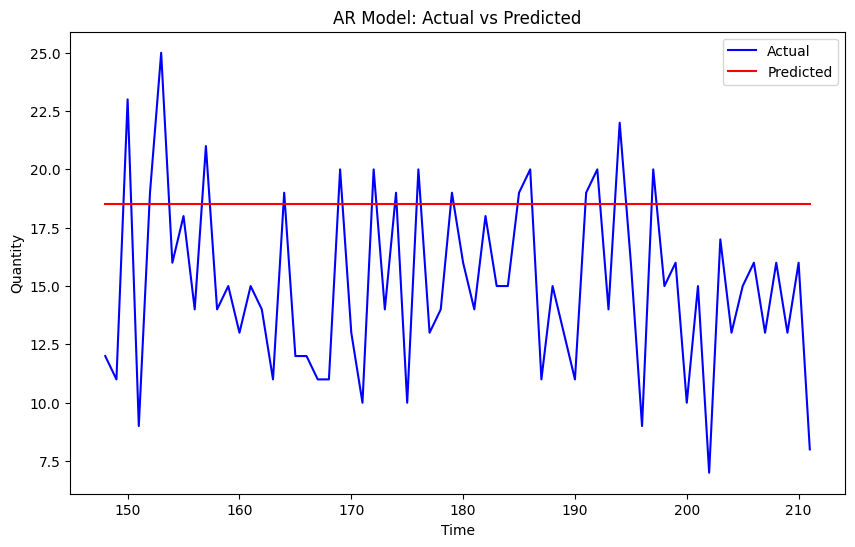

In [194]:
# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label="Actual", color="blue")
plt.plot(test.index, predictions, label="Predicted", color="red")
plt.legend()
plt.title("AR Model: Actual vs Predicted")
plt.xlabel("Time")
plt.ylabel("Quantity")
plt.show()

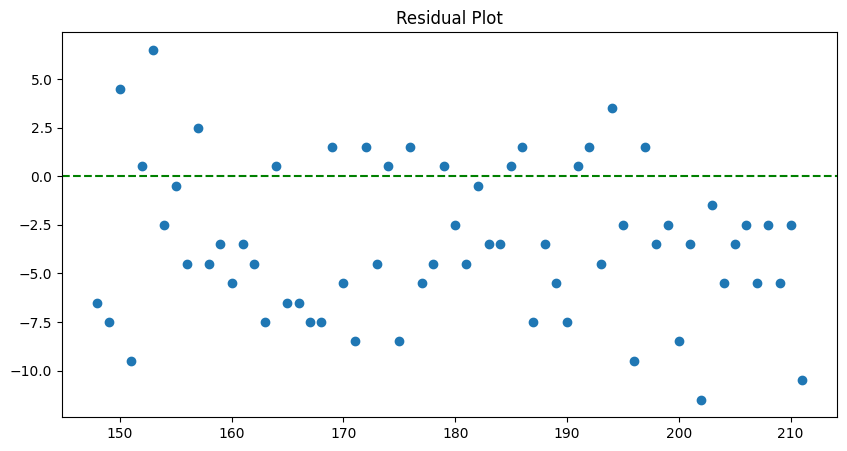

In [195]:
# Residuals plot
residuals = test - predictions
plt.figure(figsize=(10, 5))
plt.scatter(test.index, residuals)
plt.axhline(0, color='green', linestyle='--')
plt.title("Residual Plot")
plt.show()

#### This is the autoregressive model, which is performed on the quantity target column

## Moving average model

In [196]:
# 1. Ensure Stationarity
adf_test = adfuller(quantity_series)
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")

if adf_test[1] > 0.05:
    print("Series is not stationary..")
    quantity_series_diff = quantity_series.diff().dropna()
else:
    print("Series is stationary.")
    quantity_series_diff = quantity_series


ADF Statistic: -4.382341475657703
p-value: 0.0003189363163049747
Series is stationary.


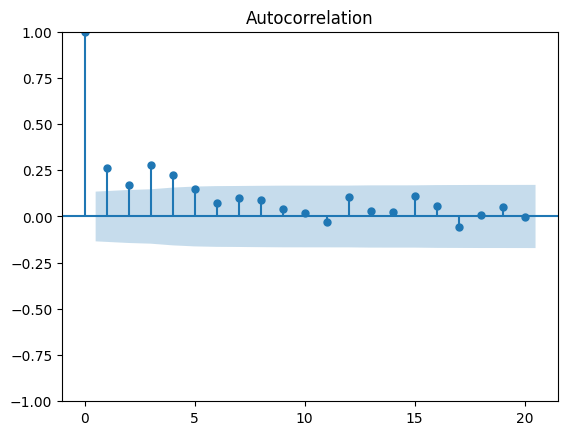

In [197]:
# 2. Plot ACF to determine 'q'
plot_acf(quantity_series_diff, lags=20)
plt.show()

In [198]:
# Choose `q` based on significant spikes in ACF plot
q = 2  # Example: If the ACF shows significant spikes at lags 1 and 2

# Split the data into train and test
train_size = int(len(quantity_series_diff) * 0.8)  # 80% for training
train, test = quantity_series_diff[:train_size], quantity_series_diff[train_size:]

In [199]:
# Fit an MA(1) model
model = ARIMA(train, order=(0, 0, 1))  # AR=0, I=0, MA=1
ma_model = model.fit()

In [200]:
#  Generate predictions
pred_start = len(train)
pred_end = len(quantity_series) - 1
predictions = ma_model.predict(start=pred_start, end=pred_end)

In [201]:
#  Evaluate the model
ma_mae = mean_absolute_error(test, predictions)
ma_mse = mean_squared_error(test, predictions)
ma_rmse = np.sqrt(ma_mse)

print("MA(1) Model Evaluation:")
print(f"Mean Absolute Error (MAE): {ma_mae}")
print(f"Mean Squared Error (MSE): {ma_mse}")
print(f"Root Mean Squared Error (RMSE): {ma_rmse}")

MA(1) Model Evaluation:
Mean Absolute Error (MAE): 3.895381819720933
Mean Squared Error (MSE): 22.076241002579447
Root Mean Squared Error (RMSE): 4.698536048875165


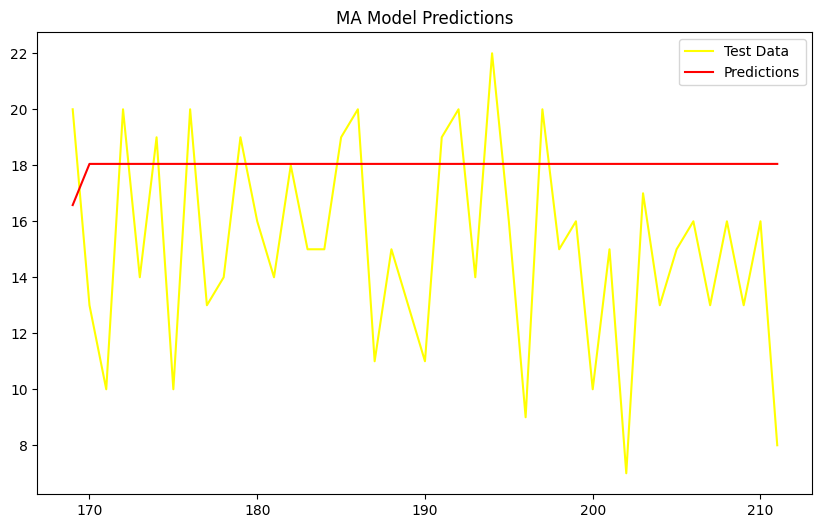

In [202]:
# Step 6: Visualize results
plt.figure(figsize=(10, 6))

plt.plot(test.index, test, label='Test Data', color='yellow')
plt.plot(test.index, predictions, label='Predictions', color='red')
plt.title('MA Model Predictions')
plt.legend()
plt.show()

#### This is the MA model, which is performed on the quantity target column, the acf graph gives q value

## ARIMA

In [203]:
# Step 1: Check for stationarity
def check_stationarity(series):
    adf_test = adfuller(series)
    print("ADF Statistic:", adf_test[0])
    print("p-value:", adf_test[1])
    p=adf_test[1]
    if p < 0.05:
        print("The series is stationary.")
    else:
        print("The series is NOT stationary. Differencing may be needed.")

check_stationarity(quantity_series)

ADF Statistic: -4.382341475657703
p-value: 0.0003189363163049747
The series is stationary.


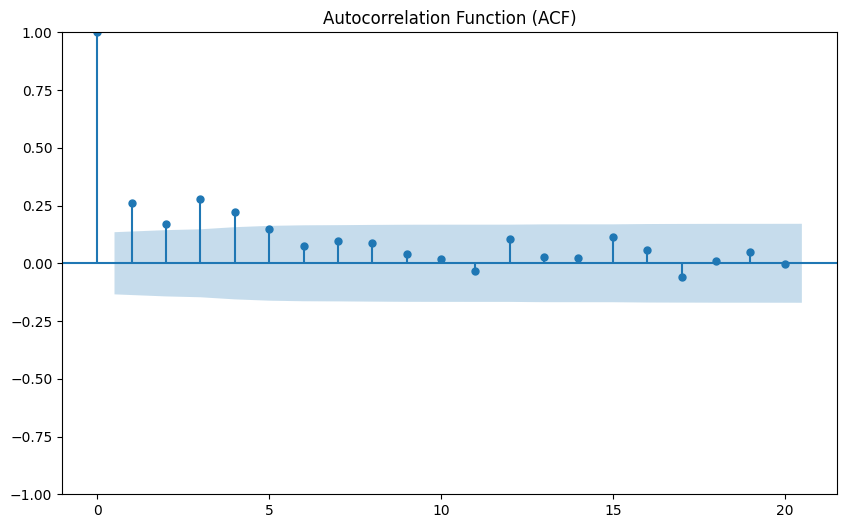

In [204]:
# Plot ACF
plt.figure(figsize=(10, 6))
plot_acf(quantity_series, lags=20, ax=plt.gca()) 
plt.title("Autocorrelation Function (ACF)")
plt.show()

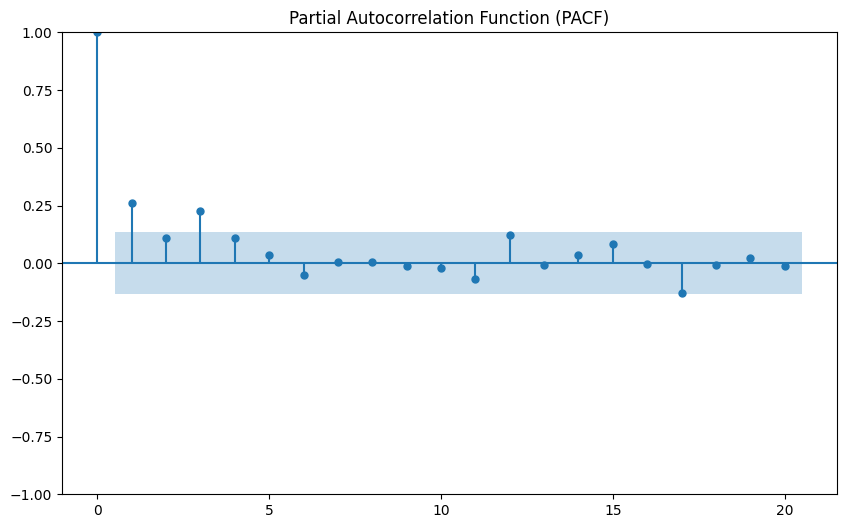

In [205]:
# Plot PACF
plt.figure(figsize=(10, 6))
plot_pacf(quantity_series, lags=20, method='ywm', ax=plt.gca())  
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()

In [206]:
# Train-test split (already done)
train_size = int(len(quantity_series) * 0.7)
train, test = quantity_series[:train_size], quantity_series[train_size:]


In [207]:
#  Fit ARIMA model
d=0
p=0
q=3
model = ARIMA(train, order=(p, d, q))  
arima_model = model.fit()
print(arima_model)

In [208]:
# Make predictions
y_pred = arima_model.forecast(steps=len(test))

# Convert predictions and test data to pandas series for comparison
y_pred_series = pd.Series(y_pred, index=test.index)

In [209]:
# Evaluate the model's performance
arima_mae = mean_absolute_error(test, y_pred)
arima_mse = mean_squared_error(test, y_pred)
arima_rmse = np.sqrt(arima_mse)

print(f"MAE: {arima_mae}")
print(f"MSE: {arima_mse}")
print(f"RMSE: {arima_rmse}")

MAE: 4.3244730001290606
MSE: 26.23024855899663
RMSE: 5.121547476983556


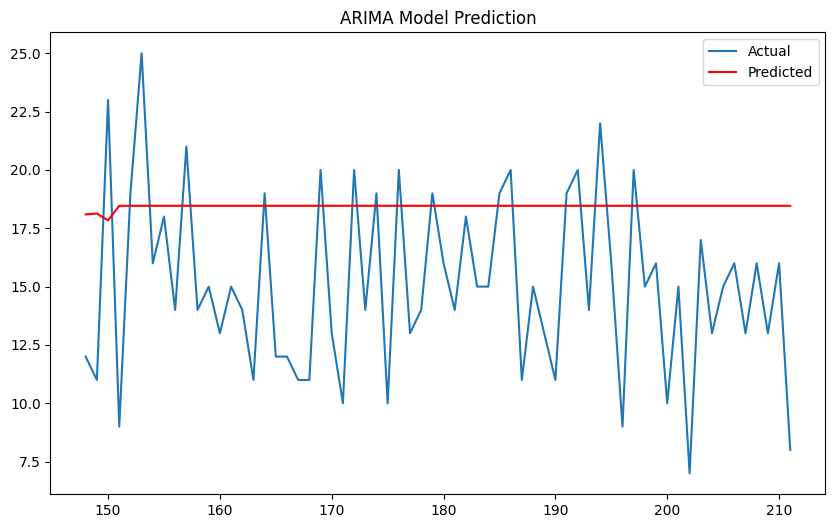

In [210]:
# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(test, label="Actual")
plt.plot(y_pred_series, label="Predicted", color='red')
plt.title("ARIMA Model Prediction")
plt.legend()
plt.show()

#### The arima is plotted to predict the quantity, acf and pacf graphs gives value of q and p. The predicted is a slight straight line.

## Arima with hyperparameter tuning

In [211]:
pip install pmdarima


Note: you may need to restart the kernel to use updated packages.


In [212]:
from pmdarima import auto_arima

# Fit auto_arima model
model = auto_arima(
    quantity_series,
    start_p=0, max_p=4,  # Range of AR terms
    start_q=0, max_q=4,  # Range of MA terms
    d=None,              # Let the model determine differencing
    seasonal=False,      # Set to True for SARIMA
    stepwise=True,       # Use stepwise search
    trace=True,          # Print search progress
    error_action="ignore",  # Ignore errors
    suppress_warnings=True,
)

# Display results
print(model.summary())

# Get optimal parameters
best_order = model.order
print(f"Optimal ARIMA order: {best_order}")


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1836.459, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1406.209, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1661.392, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1367.584, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1333.411, Time=0.05 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1319.946, Time=0.27 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1317.993, Time=0.49 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1317.567, Time=0.16 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1317.967, Time=0.20 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1586.125, Time=0.11 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1319.134, Time=0.32 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1307.647, Time=0.60 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1319.697, Time=0.32 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : 

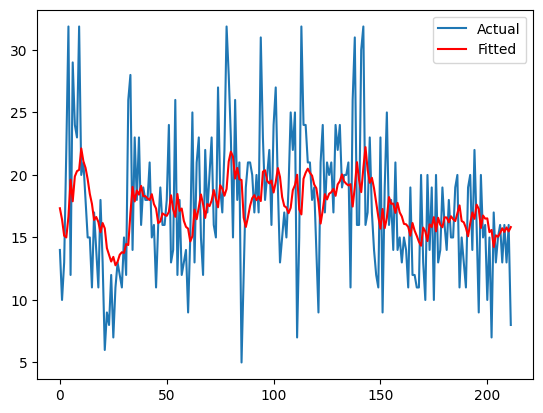

In [213]:
# Fit the best ARIMA model
final_model = ARIMA(quantity_series, order=best_order)
results = final_model.fit()

# Plot actual vs. predicted
plt.plot(quantity_series, label="Actual")
plt.plot(results.fittedvalues, label="Fitted", color="red")
plt.legend()
plt.show()

In [214]:
actual_values = quantity_series
fitted_values = results.fittedvalues  # `model_fit` is the trained ARIMA model

# Calculate MAE
arimah_mae = mean_absolute_error(actual_values, fitted_values)

# Calculate MSE
arimah_mse = mean_squared_error(actual_values, fitted_values)

# Calculate RMSE
arimah_rmse = np.sqrt(arimah_mse)

# Print the results
print(f"Mean Absolute Error (MAE): {arimah_mae}")
print(f"Mean Squared Error (MSE): {arimah_mse}")
print(f"Root Mean Squared Error (RMSE): {arimah_rmse}")


Mean Absolute Error (MAE): 4.117931045912434
Mean Squared Error (MSE): 26.908721303492808
Root Mean Squared Error (RMSE): 5.187361690059101


#### Hyperparameter tuning is done to the arima model to optimize the performance of a model and prevent overfitting.

## SARIMA

In [215]:
quantity_series.head()

0    14.000
1    10.000
2    13.000
3    22.000
4    31.875
Name: Quantity, dtype: float64

In [216]:
quantity_series.index = pd.to_datetime(quantity_series.index)

# Define SARIMA parameters
p = 1   # Non-seasonal AR order
d = 1   # Non-seasonal differencing
q = 1   # Non-seasonal MA order
P = 1   # Seasonal AR order
D = 1   # Seasonal differencing
Q = 1   # Seasonal MA order
S = 12  # Seasonal period (e.g., 12 for monthly data, adjust for your data)

# Fit SARIMA model
model = SARIMAX(
    quantity_series,
    order=(p, d, q),
    seasonal_order=(P, D, Q, S),
    enforce_stationarity=False,
    enforce_invertibility=False,
)

results = model.fit()

In [217]:
# # Print the summary of the model
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                           Quantity   No. Observations:                  212
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -573.564
Date:                            Tue, 24 Dec 2024   AIC                           1157.127
Time:                                    22:44:53   BIC                           1173.229
Sample:                                01-01-1970   HQIC                          1163.653
                                     - 01-01-1970                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1059      0.084      1.254      0.210      -0.060       0.272
ma.L1         -0.8947      0.045   

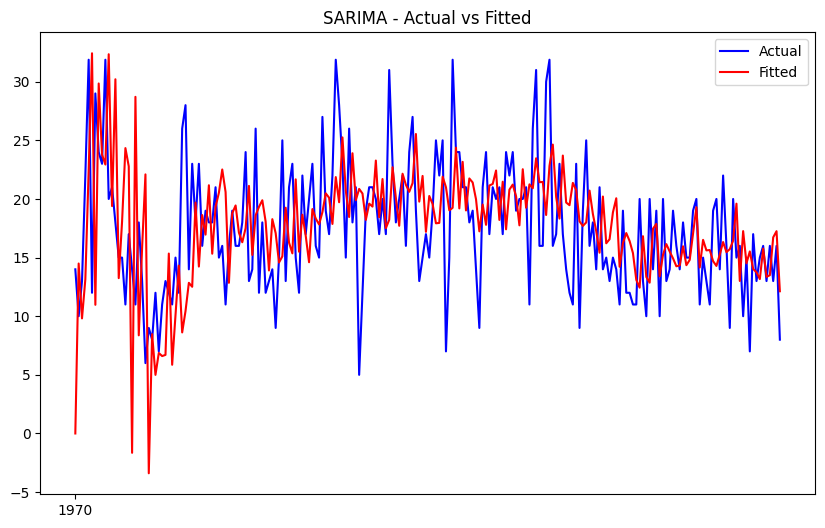

In [218]:
# Plot the actual vs fitted values
plt.figure(figsize=(10, 6))
plt.plot(quantity_series, label="Actual", color="blue")
plt.plot(results.fittedvalues, label="Fitted", color="red")
plt.title("SARIMA - Actual vs Fitted")
plt.legend()
plt.show()


In [219]:
# Get actual and fitted values
actual_values = quantity_series
fitted_values = results.fittedvalues  # Fitted values from the SARIMA model

# Calculate MAE
sarima_mae = mean_absolute_error(actual_values, fitted_values)

# Calculate MSE
sarima_mse = mean_squared_error(actual_values, fitted_values)

# Calculate RMSE
sarima_rmse = np.sqrt(sarima_mse)

# Print the results
print(f"Mean Absolute Error (MAE): {sarima_mae}")
print(f"Mean Squared Error (MSE): {sarima_mse}")
print(f"Root Mean Squared Error (RMSE): {sarima_rmse}")


Mean Absolute Error (MAE): 4.891972372026885
Mean Squared Error (MSE): 39.89409019629754
Root Mean Squared Error (RMSE): 6.3161768655015935


#### Sarima model is built to get the fitted values of the target column.

## SARIMA with HyperParameter tuning

In [220]:
# Define the parameter ranges for SARIMA
p = d = q = range(0, 3)  # Non-seasonal ARIMA parameters
P = D = Q = range(0, 2)  # Seasonal ARIMA parameters
S = [12]  # Seasonal period (e.g., 12 for monthly data)

# Generate all combinations of SARIMA parameters
non_seasonal_orders = list(itertools.product(p, d, q))
seasonal_orders = list(itertools.product(P, D, Q, S))

In [221]:
# Initialize variables to store the best parameters and AIC value
best_aic = float("inf")
best_params = None
best_model = None

# Perform grid search
for order in non_seasonal_orders:
    for seasonal_order in seasonal_orders:
        try:
            # Fit the SARIMA model
            model = SARIMAX(
                quantity_series,
                order=order,
                seasonal_order=seasonal_order,
                enforce_stationarity=False,
                enforce_invertibility=False,
            )
            results = model.fit(disp=False)

            # Compare the AIC value
            if results.aic < best_aic:
                best_aic = results.aic
                best_params = (order, seasonal_order)
                best_model = results
        except Exception as e:
            continue




In [222]:
# Print the best parameters and AIC value
print(f"Best SARIMA Parameters: {best_params}")
print(f"Best AIC: {best_aic}")

# Display summary of the best model
print(best_model.summary())

#evaluation metrics
sarih_mae = mean_absolute_error(actual_values, fitted_values)
sarih_mse = mean_squared_error(actual_values, fitted_values)
sarih_rmse = np.sqrt(sarih_mse)



Best SARIMA Parameters: ((0, 1, 2), (1, 1, 1, 12))
Best AIC: 1150.2469751023043
                                      SARIMAX Results                                       
Dep. Variable:                             Quantity   No. Observations:                  212
Model:             SARIMAX(0, 1, 2)x(1, 1, [1], 12)   Log Likelihood                -570.123
Date:                              Tue, 24 Dec 2024   AIC                           1150.247
Time:                                      22:45:35   BIC                           1166.322
Sample:                                  01-01-1970   HQIC                          1156.762
                                       - 01-01-1970                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7

In [223]:
#Evaluation metrics
print("Evaluation metrics")
print(f"Mean Absolute Error (MAE): {sarih_mae}")
print(f"Mean Squared Error (MSE): {sarih_mse}")
print(f"Root Mean Squared Error (RMSE): {sarih_rmse}")

Evaluation metrics
Mean Absolute Error (MAE): 4.891972372026885
Mean Squared Error (MSE): 39.89409019629754
Root Mean Squared Error (RMSE): 6.3161768655015935


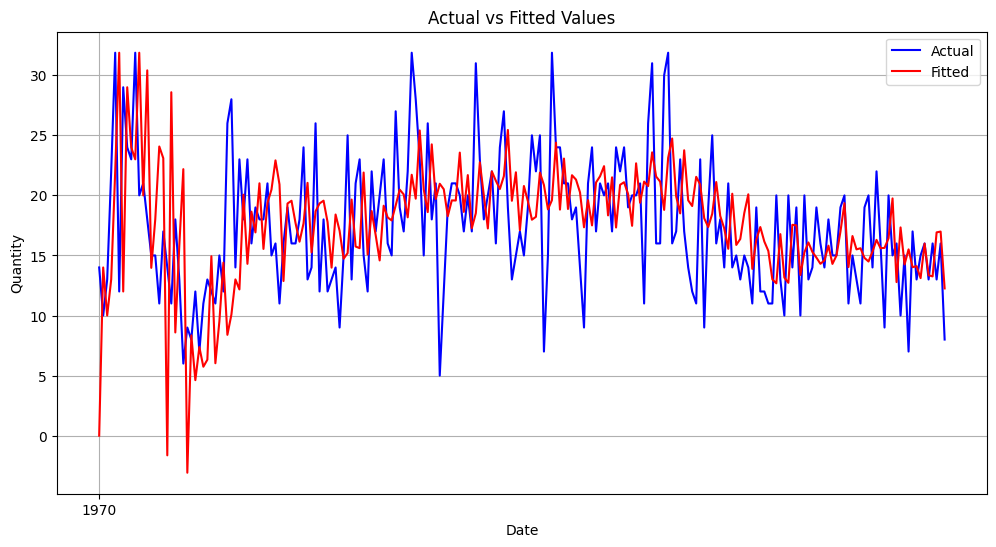

In [224]:
# Plot actual vs fitted values with date index as x-axis
plt.figure(figsize=(12, 6))
plt.plot(quantity_series.index, quantity_series, label="Actual", color="blue")
plt.plot(best_model.fittedvalues.index, best_model.fittedvalues, label="Fitted", color="red")
plt.title("Actual vs Fitted Values")
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.legend()
plt.grid()
plt.show()

#### Hyperparameter tuning is done to the sarima model to optimize the performance of a model and prevent overfitting.

In [225]:
final_df.to_csv('output_dataset.csv', index=False)

## ARIMAX

In [226]:
# Load the dataset
data = pd.read_csv("output_dataset.csv")

# Convert relevant columns to proper types
data["Day Index"] = pd.to_datetime(data["Day Index"])
data["Clicks"] = pd.to_numeric(data["Clicks"], errors="coerce")
data["Impressions"] = pd.to_numeric(data["Impressions"], errors="coerce")
data["Quantity"] = pd.to_numeric(data["Quantity"], errors="coerce")

# Sort by date to ensure time order
data = data.sort_values("Day Index")

# Define target and exogenous variables
y = data["Quantity"]
X = data[["Clicks", "Impressions"]]

# Split into train-test sets (80-20 split)
train_size = int(len(y) * 0.8)
y_train, y_test = y[:train_size], y[train_size:]
X_train, X_test = X[:train_size], X[train_size:]


In [227]:
# Define ARIMAX order
order = (1, 1, 1)  # Modify based on optimization results

# Fit the ARIMAX model
arimax_model = SARIMAX(y_train, exog=X_train, order=order)
arimax_fit = arimax_model.fit(disp=False)

# Print summary
print(arimax_fit.summary())


                               SARIMAX Results                                
Dep. Variable:               Quantity   No. Observations:                  169
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -519.514
Date:                Tue, 24 Dec 2024   AIC                           1049.028
Time:                        22:45:36   BIC                           1064.647
Sample:                             0   HQIC                          1055.367
                                - 169                                         
Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Clicks          0.0169      0.005      3.582      0.000       0.008       0.026
Impressions     0.0014      0.001      1.288      0.198      -0.001       0.004
ar.L1           0.1759      0.077      2.293    

In [228]:
# Predict for the test set
y_pred = arimax_fit.get_prediction(start=y_test.index[0], end=y_test.index[-1], exog=X_test)
y_pred_mean = y_pred.predicted_mean


In [229]:
# Calculate metrics
arimax_mae = mean_absolute_error(y_test, y_pred_mean)
arimax_mse = mean_squared_error(y_test, y_pred_mean)
arimax_rmse = np.sqrt(arimax_mse)

print(f"MAE: {arimax_mae}")
print(f"MSE: {arimax_mse}")
print(f"RMSE: {arimax_rmse}")


MAE: 3.2851845718688413
MSE: 16.353813940797465
RMSE: 4.043984908576869


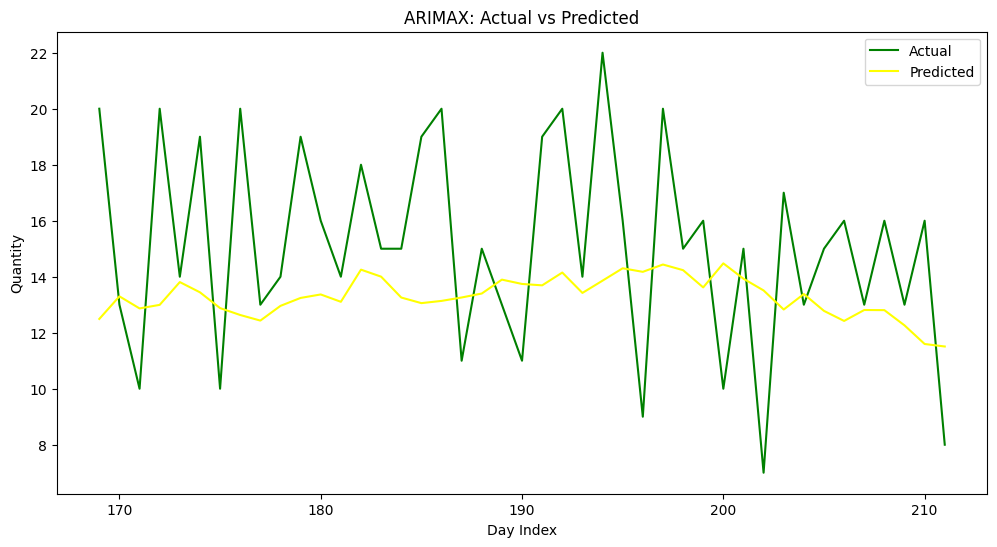

In [230]:
# Plot Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual", color="green")
plt.plot(y_test.index, y_pred_mean, label="Predicted", color="yellow")
plt.legend()
plt.title("ARIMAX: Actual vs Predicted")
plt.xlabel("Day Index")
plt.ylabel("Quantity")
plt.show()


#### ARIMAX is performed to get the external variables along with target column. It shows difference in the evaluation metrics.

## SARIMAX

In [231]:
# Convert relevant columns
data["Day Index"] = pd.to_datetime(data["Day Index"])
data["Clicks"] = pd.to_numeric(data["Clicks"], errors="coerce")
data["Impressions"] = pd.to_numeric(data["Impressions"], errors="coerce")
data["Quantity"] = pd.to_numeric(data["Quantity"], errors="coerce")

# Sort by date to ensure time order
data = data.sort_values("Day Index")

# Define target and exogenous variables
y = data["Quantity"]
X = data[["Clicks", "Impressions"]]

# Split into train-test sets (80-20 split)
train_size = int(len(y) * 0.8)
y_train, y_test = y[:train_size], y[train_size:]
X_train, X_test = X[:train_size], X[train_size:]


In [232]:
# Define SARIMAX order and seasonal order
order = (1, 1, 1)  
seasonal_order = (1, 1, 1, 7) 

# Fitting the SARIMAX model
sarimax_model = SARIMAX(y_train, exog=X_train, order=order, seasonal_order=seasonal_order)
sarimax_fit = sarimax_model.fit(disp=False)

print(sarimax_fit.summary())


                                     SARIMAX Results                                     
Dep. Variable:                          Quantity   No. Observations:                  169
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood                -512.280
Date:                           Tue, 24 Dec 2024   AIC                           1038.561
Time:                                   22:45:37   BIC                           1060.131
Sample:                                        0   HQIC                          1047.319
                                           - 169                                         
Covariance Type:                             opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Clicks          0.0179      0.006      3.150      0.002       0.007       0.029
Impressions     0.0008      0.001      0

In [233]:
# Predict for the test set
y_pred = sarimax_fit.get_prediction(start=y_test.index[0], end=y_test.index[-1], exog=X_test)
y_pred_mean = y_pred.predicted_mean


In [234]:
# Evaluation metrics
sarimax_mae = mean_absolute_error(y_test, y_pred_mean)
sarimax_mse = mean_squared_error(y_test, y_pred_mean)
sarimax_rmse = np.sqrt(sarimax_mse)

print(f"MAE: {sarimax_mae}")
print(f"MSE: {sarimax_mse}")
print(f"RMSE: {sarimax_rmse}")


MAE: 2.970592874285823
MSE: 13.869835321882816
RMSE: 3.724222780914538


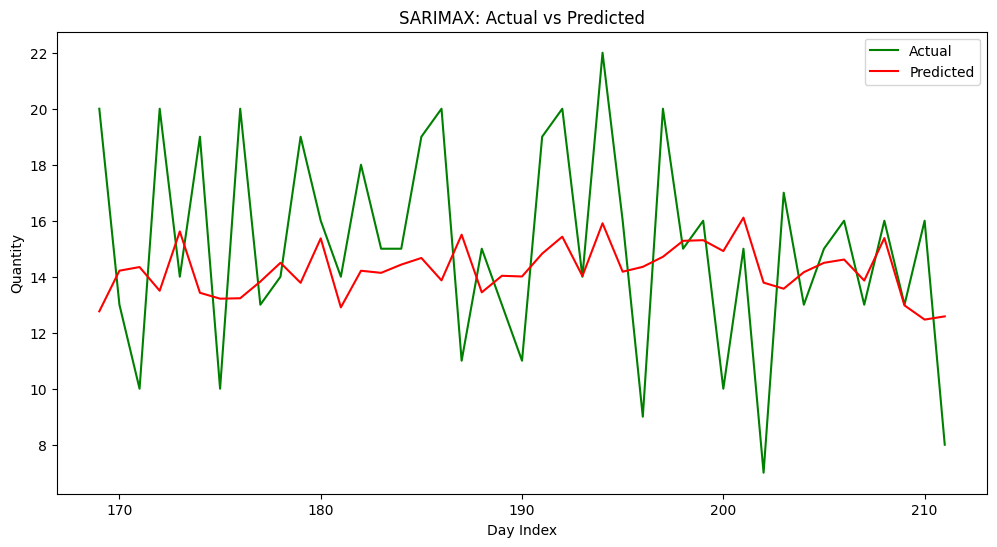

In [235]:
# Plot Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual", color="green")
plt.plot(y_test.index, y_pred_mean, label="Predicted", color="red")
plt.legend()
plt.title("SARIMAX: Actual vs Predicted")
plt.xlabel("Day Index")
plt.ylabel("Quantity")
plt.show()


#### SARIMAX is performed to get the external variables along with target column. It shows difference in the evaluation metrics.The graph shows the actual and predicted values

## ARIMAX Hyper Parameter Tuning

In [236]:
# Ensure 'Day Index' is parsed as datetime and set as the index
data["Day Index"] = pd.to_datetime(data["Day Index"])
data = data.sort_values("Day Index")
data = data.set_index("Day Index")

# Convert relevant columns
data["Clicks"] = pd.to_numeric(data["Clicks"], errors="coerce")
data["Impressions"] = pd.to_numeric(data["Impressions"], errors="coerce")
data["Quantity"] = pd.to_numeric(data["Quantity"], errors="coerce")

# Define target and exogenous variables
y = data["Quantity"]
X = data[["Clicks", "Impressions"]]

# Train-test split (80-20)
train_size = int(len(y) * 0.8)
y_train, y_test = y[:train_size], y[train_size:]
X_train, X_test = X[:train_size], X[train_size:]


In [237]:
# Define parameter grid for ARIMA/SARIMA
p = range(0, 3)  # AR terms
d = range(0, 2)  # Differencing
q = range(0, 3)  # MA terms
P = range(0, 2)  # Seasonal AR
D = range(0, 2)  # Seasonal differencing
Q = range(0, 2)  # Seasonal MA
s = [7]  # Seasonal period (e.g., weekly seasonality)

# Create combinations of parameters
arima_params = list(itertools.product(p, d, q))


In [238]:
#training and building arimax
best_arimax_score = float("inf")
best_arimax_order = None

for order in arima_params:
    try:
        # Fit ARIMAX
        model = SARIMAX(y_train, exog=X_train, order=order)
        result = model.fit(disp=False, maxiter=50)  # Run for 50 epochs
        
        # Evaluate on test data
        y_pred = result.get_prediction(start=y_test.index[0], end=y_test.index[-1], exog=X_test).predicted_mean
        mae = mean_absolute_error(y_test, y_pred)
        
        if mae < best_arimax_score:
            best_arimax_score = mae
            best_arimax_order = order
    except Exception as e:
        print(f"Error with ARIMAX order {order}: {e}")

print(f"Best ARIMAX Order: {best_arimax_order} with MAE: {best_arimax_score}")


Best ARIMAX Order: (1, 1, 2) with MAE: 3.148565356548073


In [239]:
# Fit Best ARIMAX Model
best_arimax_model = SARIMAX(y_train, exog=X_train, order=best_arimax_order)
arimaxh_result = best_arimax_model.fit(disp=False, maxiter=50)

# Predict with ARIMAX
arimaxh_pred = arimaxh_result.get_prediction(start=y_test.index[0], end=y_test.index[-1], exog=X_test).predicted_mean

In [240]:
# ARIMAX Metrics
arimaxh_mae = mean_absolute_error(y_test, arimaxh_pred)
arimaxh_mse = mean_squared_error(y_test, arimaxh_pred)
arimaxh_rmse = np.sqrt(arimaxh_mse)
print(f"ARIMAX - MAE: {arimaxh_mae}, MSE: {arimaxh_mse}, RMSE: {arimaxh_rmse}")

ARIMAX - MAE: 3.148565356548073, MSE: 15.281295887757995, RMSE: 3.9091298120883624


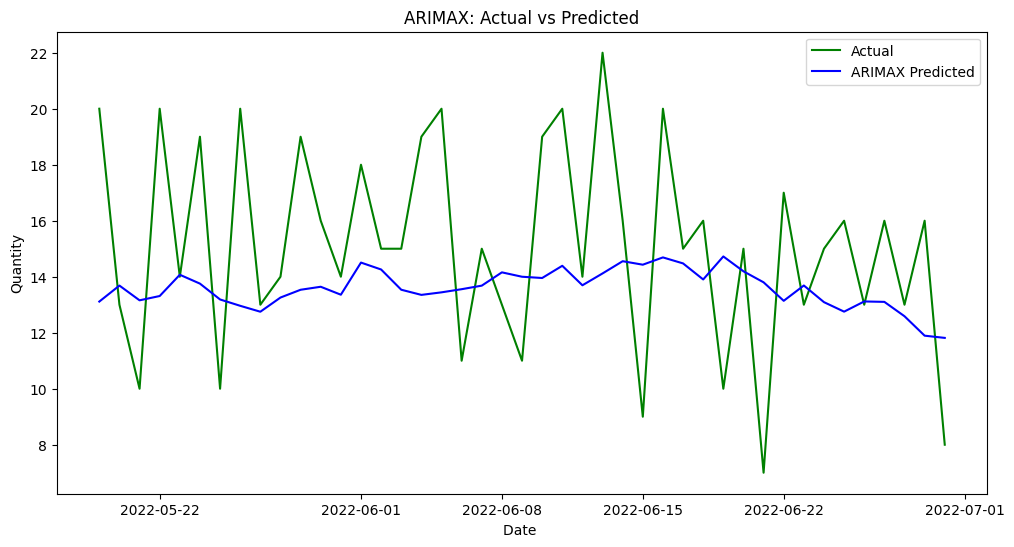

In [241]:
# Plot ARIMAX Results
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual", color="green")
plt.plot(y_test.index, arimaxh_pred, label="ARIMAX Predicted", color="blue")
plt.legend()
plt.title("ARIMAX: Actual vs Predicted")
plt.xlabel("Date ")
plt.ylabel("Quantity")
plt.show()

#### ARIMAX is performed along with Hyper Parameter Tuning to get the external variables along with target column. It shows difference in the evaluation metrics, as external variables, effect the prediction

## SARIMAX Hyper Parameter Tuning 

In [242]:
sarima_params = list(itertools.product(p, d, q, P, D, Q, s))

In [243]:
best_sarimax_score = float("inf")
best_sarimax_order = None

for params in sarima_params:
    try:
        # Fit SARIMAX
        model = SARIMAX(y_train, exog=X_train, order=params[:3], seasonal_order=params[3:])
        result = model.fit(disp=False, maxiter=50)  # Run for 50 epochs
        
        # Evaluate on test data
        y_pred = result.get_prediction(start=y_test.index[0], end=y_test.index[-1], exog=X_test).predicted_mean
        mae = mean_absolute_error(y_test, y_pred)
        
        if mae < best_sarimax_score:
            best_sarimax_score = mae
            best_sarimax_order = params
    except Exception as e:
        print(f"Error with SARIMAX order {params}: {e}")

print(f"Best SARIMAX Order: {best_sarimax_order} with MAE: {best_sarimax_score}")


Best SARIMAX Order: (1, 1, 2, 0, 1, 1, 7) with MAE: 2.9479509027950797


In [244]:
# Fit Best SARIMAX Model
best_sarimax_model = SARIMAX(y_train, exog=X_train, order=best_sarimax_order[:3], seasonal_order=best_sarimax_order[3:])
sarimaxh_result = best_sarimax_model.fit(disp=False, maxiter=50)

# Predict with SARIMAX
sarimaxh_pred = sarimaxh_result.get_prediction(start=y_test.index[0], end=y_test.index[-1], exog=X_test).predicted_mean

In [245]:
# SARIMAX Metrics
sarimaxh_mae = mean_absolute_error(y_test, sarimaxh_pred)
sarimaxh_mse = mean_squared_error(y_test, sarimaxh_pred)
sarimaxh_rmse = np.sqrt(sarimaxh_mse)
print(f"SARIMAX - MAE: {sarimaxh_mae}, MSE: {sarimaxh_mse}, RMSE: {sarimaxh_rmse}")

SARIMAX - MAE: 2.9479509027950797, MSE: 13.745612841298312, RMSE: 3.707507631994614


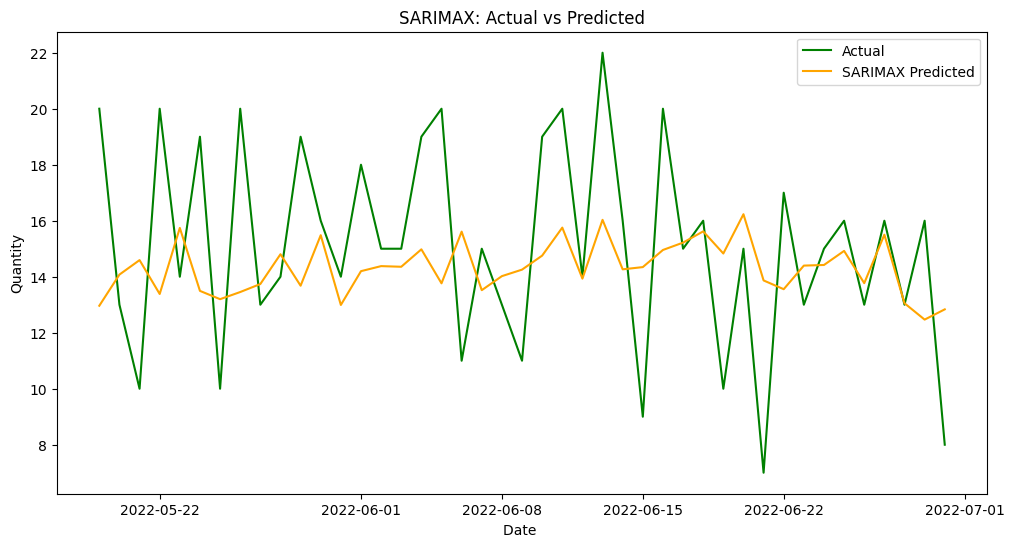

In [246]:
# Plot SARIMAX Results
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual", color="green")
plt.plot(y_test.index, sarimaxh_pred, label="SARIMAX Predicted", color="orange")
plt.legend()
plt.title("SARIMAX: Actual vs Predicted")
plt.xlabel("Date ")
plt.ylabel("Quantity")

plt.show()

#### SARIMAX is performed along with Hyper Parameter Tuning to get the external variables along with target column. It shows difference in the evaluation metrics, as external variables, effect the prediction

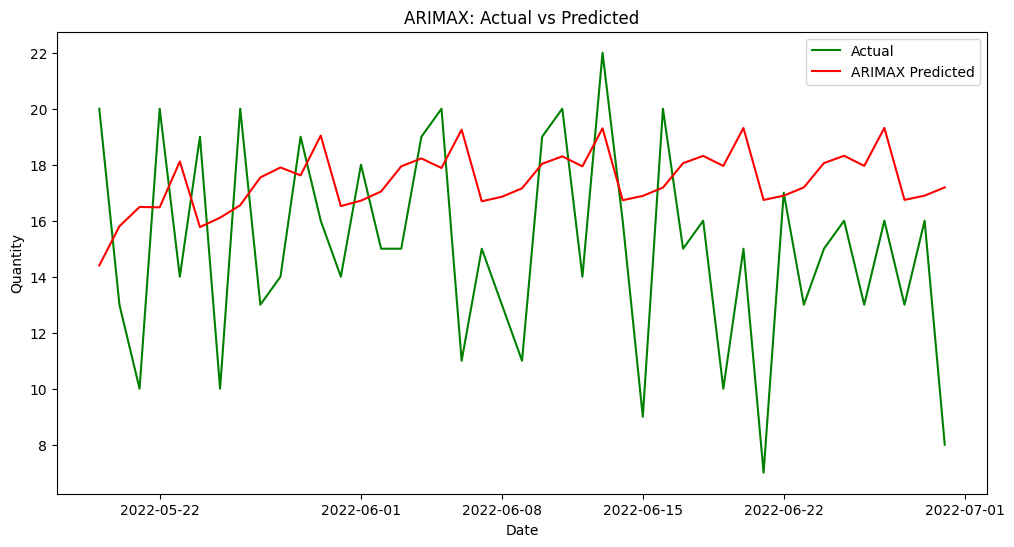

ARIMAX MSE: 19.138703205868488
ARIMAX MAE: 3.71457854052864
ARIMAX RMSE: 4.374780360871673


In [247]:
# Display the first few rows of the dataset
#data.head()

# Prepare the data
quantity_series = data['Quantity']

# Exogenous variables
exog_variables = data[['Is_Weekday', 'IsMonday', 'IsTuesday', 'IsWednesday', 'IsThursday','IsFriday','IsSaturday','IsSunday','Quarter']]

# Split the data into training and testing (80-20 split)
train_size = int(len(quantity_series) * 0.8)
train_data = quantity_series[:train_size]
test_data = quantity_series[train_size:]
exog_train = exog_variables[:train_size]
exog_test = exog_variables[train_size:]

# ARIMAX Model
arimax_model = ARIMA(train_data, exog=exog_train, order=(1, 0, 1))
arimax_fit = arimax_model.fit()

# Forecast for ARIMAX
arimax_forecast = arimax_fit.forecast(steps=len(test_data), exog=exog_test)

# Plot ARIMAX actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Actual', color='green')
plt.plot(test_data.index, arimax_forecast, label='ARIMAX Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('ARIMAX: Actual vs Predicted')
plt.legend()
plt.show()

# Evaluate ARIMAX Model
arimax_mse_2 = mean_squared_error(test_data, arimax_forecast)
arimax_mae_2 = mean_absolute_error(test_data, arimax_forecast)
arimax_rmse_2 = sqrt(arimax_mse_2)

print(f"ARIMAX MSE: {arimax_mse_2}")
print(f"ARIMAX MAE: {arimax_mae_2}")
print(f"ARIMAX RMSE: {arimax_rmse_2}")



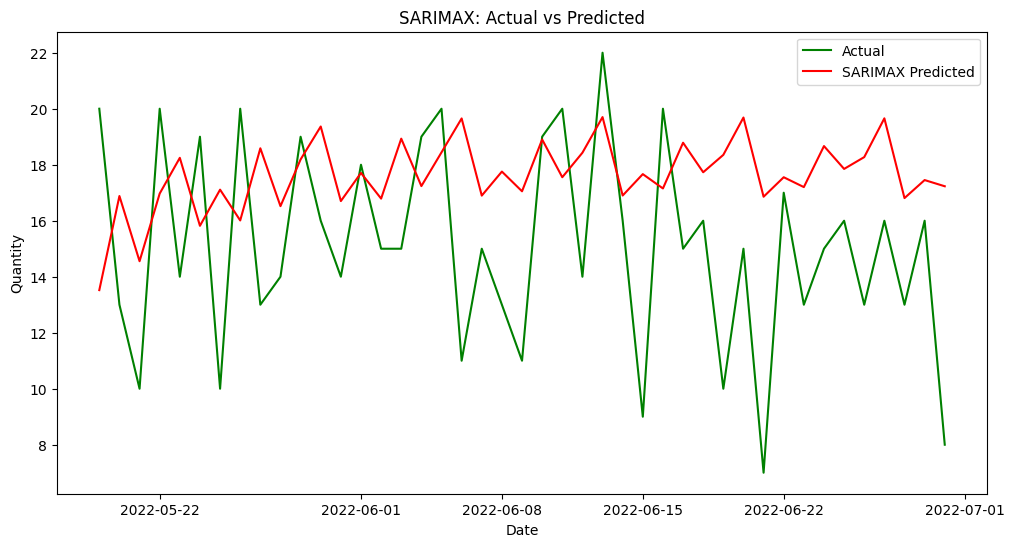

SARIMAX MSE: 20.913485177133396
SARIMAX MAE: 3.858915498983943
SARIMAX RMSE: 4.57312641167215


In [248]:
# SARIMAX Model
sarimax_model = SARIMAX(train_data, exog=exog_train, order=(1, 0, 1), seasonal_order=(1, 0, 1, 7))
sarimax_fit = sarimax_model.fit(disp=False)

# Forecast for SARIMAX
sarimax_forecast = sarimax_fit.forecast(steps=len(test_data), exog=exog_test)

# Plot SARIMAX actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Actual', color='green')
plt.plot(test_data.index, sarimax_forecast, label='SARIMAX Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('SARIMAX: Actual vs Predicted')
plt.legend()
plt.show()

# Evaluate SARIMAX Model
sarimax_mse_2 = mean_squared_error(test_data, sarimax_forecast)
sarimax_mae_2 = mean_absolute_error(test_data, sarimax_forecast)
sarimax_rmse_2 = np.sqrt(sarimax_mse_2)

print(f"SARIMAX MSE: {sarimax_mse_2}")
print(f"SARIMAX MAE: {sarimax_mae_2}")
print(f"SARIMAX RMSE: {sarimax_rmse_2}")


## Evaluation Metrics

In [249]:
metrics_data = {
    "Model": ["AR", "MA", "ARIMA", "SARIMA", "ARIMAX", "SARIMAX"],
    "MAE": [ar_mae, ma_mae, arima_mae, sarima_mae, arimax_mae, sarimax_mae],
    "MSE": [ar_mse, ma_mse, arima_mse, sarima_mse, arimax_mse, sarimax_mse],
    "RMSE": [ar_rmse, ma_rmse, arima_rmse, sarima_rmse, arimax_rmse, sarimax_rmse]
}

# Create DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Print the table
print(metrics_df)



     Model       MAE        MSE      RMSE
0       AR  4.341639  26.502235  5.148032
1       MA  3.895382  22.076241  4.698536
2    ARIMA  4.324473  26.230249  5.121547
3   SARIMA  4.891972  39.894090  6.316177
4   ARIMAX  3.285185  16.353814  4.043985
5  SARIMAX  2.970593  13.869835  3.724223


In [250]:
metrics_hyper_data = {
    "Model": ["ARIMA Hyperparameter tuning", "SARIMA Hyperparameter tuning", "ARIMAX Hyperparameter tuning", "SARIMAX Hyperparameter tuning","ARIMAX Hyperparameter tuning (with other attributes)","SARIMAX Hyperparameter tuning (with other attributes)"],
    "MAE": [arimah_mae, sarih_mae, arimaxh_mae, sarimaxh_mae,arimax_mae_2,sarimax_mae_2],
    "MSE": [arimah_mse, sarih_mse, arimaxh_mse, sarimaxh_mse,arimax_mse_2,sarimax_mse_2],
    "RMSE": [arimah_rmse, sarih_rmse, arimaxh_rmse, sarimaxh_rmse,arimax_rmse_2,sarimax_rmse_2]
}

# Create DataFrame
metrics_hyper_df = pd.DataFrame(metrics_hyper_data)

# Print the table
print(metrics_hyper_df)


                                               Model       MAE        MSE  \
0                        ARIMA Hyperparameter tuning  4.117931  26.908721   
1                       SARIMA Hyperparameter tuning  4.891972  39.894090   
2                       ARIMAX Hyperparameter tuning  3.148565  15.281296   
3                      SARIMAX Hyperparameter tuning  2.947951  13.745613   
4  ARIMAX Hyperparameter tuning (with other attri...  3.714579  19.138703   
5  SARIMAX Hyperparameter tuning (with other attr...  3.858915  20.913485   

       RMSE  
0  5.187362  
1  6.316177  
2  3.909130  
3  3.707508  
4  4.374780  
5  4.573126  


#### SARIMAX Hyperparameter tuning with exogenous variables yields the best performance, with the lowest MSE 2.95 and RMSE 3.71.ARIMAX Hyperparameter tuning also performs well, with an RMSE of 3.91, making these 2 models better to work with.

In [251]:
data.head()

,Clicks,Impressions,Quantity,Day,Is_Weekend,Month,Day_of_Week,Quarter,Is_Weekday,IsMonday,IsTuesday,IsWednesday,IsThursday,IsFriday,IsSaturday,IsSunday
Day Index,,,,,,,,,,,,,,,,
2021-12-01,445,620,14.000,Wednesday,0,December,2,4,1,0,0,1,0,0,0,0
2021-12-02,433,890,10.000,Thursday,0,December,3,4,1,0,0,0,1,0,0,0
2021-12-03,424,851,13.000,Friday,0,December,4,4,1,0,0,0,0,1,0,0
2021-12-04,427,881,22.000,Saturday,1,December,5,4,0,0,0,0,0,0,1,0
2021-12-05,451,678,31.875,Sunday,1,December,6,4,0,0,0,0,0,0,0,1


In [252]:
data_copy=data.copy()
data_copy.head()

,Clicks,Impressions,Quantity,Day,Is_Weekend,Month,Day_of_Week,Quarter,Is_Weekday,IsMonday,IsTuesday,IsWednesday,IsThursday,IsFriday,IsSaturday,IsSunday
Day Index,,,,,,,,,,,,,,,,
2021-12-01,445,620,14.000,Wednesday,0,December,2,4,1,0,0,1,0,0,0,0
2021-12-02,433,890,10.000,Thursday,0,December,3,4,1,0,0,0,1,0,0,0
2021-12-03,424,851,13.000,Friday,0,December,4,4,1,0,0,0,0,1,0,0
2021-12-04,427,881,22.000,Saturday,1,December,5,4,0,0,0,0,0,0,1,0
2021-12-05,451,678,31.875,Sunday,1,December,6,4,0,0,0,0,0,0,0,1


## Multi Variate Regression

Mean Absolute Error (MAE): 3.2004237276509357
Mean Squared Error (MSE): 15.704049178688175
Root Mean Squared Error (RMSE): 3.962833478546402
R2 Score: -0.19384865271747564


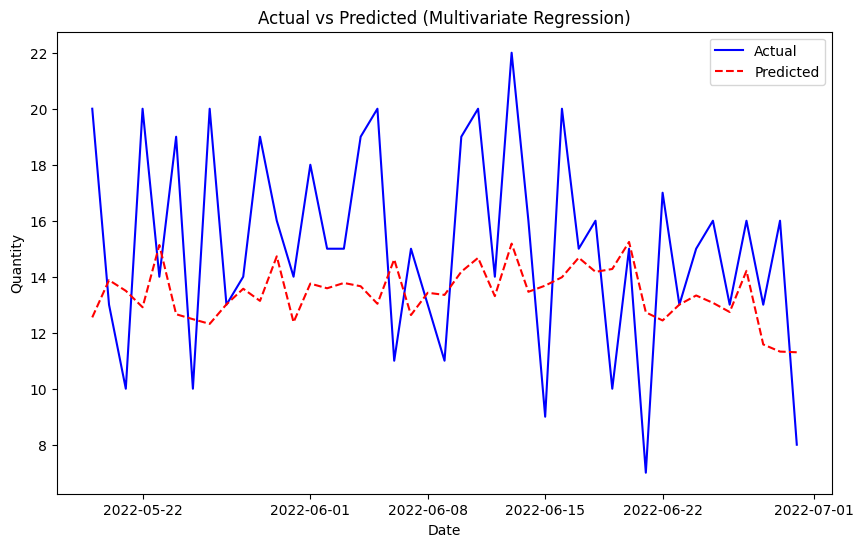

In [253]:
# MVR 

X = data[['Clicks', 'Impressions', 'Day_of_Week', 'Quarter', 'Is_Weekend', 'Is_Weekday',
          'IsMonday', 'IsTuesday', 'IsWednesday', 'IsThursday', 'IsFriday']]
y = data['Quantity']  # Target variable

# Train-test split (80-20 split while preserving time order)
split_point = int(len(data) * 0.8)
X_train, X_test = X.iloc[:split_point], X.iloc[split_point:]
y_train, y_test = y.iloc[:split_point], y.iloc[split_point:]

# Multivariate regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R2 Score:", r2)

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='red', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Actual vs Predicted (Multivariate Regression)')
plt.legend()
plt.show()


Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Hyperparameters: {'regressor__fit_intercept': True}
Mean Absolute Error (MAE): 4.114063392625343
Root Mean Squared Error (RMSE): 5.5005044043272
R² Score: -0.06991635333442714


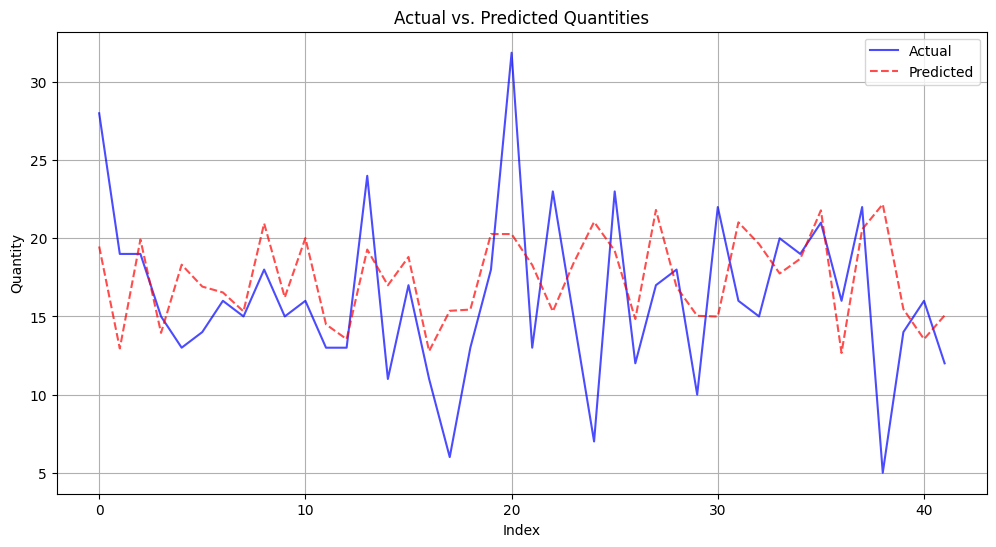

In [254]:
# Create lag features
for lag in range(1, 4):  # Adding lag-1, lag-2, and lag-3 features
    data[f"Quantity_lag{lag}"] = data["Quantity"].shift(lag)

# Drop rows with NaN values introduced by lagging
data = data.dropna()

# Define independent variables (X) and target variable (y) with lag features
X = data[["Clicks", "Impressions", "Is_Weekend", "Day_of_Week", "Quarter",
          "Is_Weekday", "IsMonday", "IsTuesday", "IsWednesday",
          "IsThursday", "IsFriday", "IsSaturday", "IsSunday",
          "Quantity_lag1", "Quantity_lag2", "Quantity_lag3"]]
y = data["Quantity"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with scaling and regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalize the features
    ('regressor', LinearRegression())
])

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'regressor__fit_intercept': [True, False]  # Whether to calculate the intercept
}

# Initialize GridSearchCV with cross-validation and R² as the scoring metric
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', verbose=1)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print results
print("Best Hyperparameters:", grid_search.best_params_)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

# Visualize Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', color='b', alpha=0.7)
plt.plot(y_pred, label='Predicted', color='r', linestyle='--', alpha=0.7)
plt.title('Actual vs. Predicted Quantities')
plt.xlabel('Index')
plt.ylabel('Quantity')
plt.legend(loc='best')
plt.grid(True)
plt.show()


## Forecasting based on sarimax model

Adjusting exogenous data shape. Required shape: (42, 6), got: (42, 16)
Adjusted exogenous data shape: (42, 6)
Forecasted Values:
2022-05-20    22.689565
2022-05-21    15.712305
2022-05-22    20.032953
2022-05-23    16.850591
2022-05-24    19.949369
2022-05-25    12.382728
2022-05-26    19.812595
2022-05-27    12.436737
2022-05-28    22.371053
2022-05-29    13.095329
2022-05-30    23.445826
2022-05-31    14.840464
2022-06-01    14.731171
2022-06-02    18.919925
2022-06-03    15.701605
2022-06-04    23.053989
2022-06-05    14.313305
2022-06-06    18.565141
2022-06-07    12.530174
2022-06-08    22.661087
2022-06-09    21.086550
2022-06-10    17.005709
2022-06-11    14.416322
2022-06-12    21.157117
2022-06-13    22.470567
2022-06-14    19.769229
2022-06-15    18.638768
2022-06-16    20.155443
2022-06-17    21.225900
2022-06-18    14.231568
2022-06-19    16.729322
2022-06-20    18.998168
2022-06-21    22.230592
2022-06-22    20.197737
2022-06-23    17.793914
2022-06-24    20.411921
2022-06

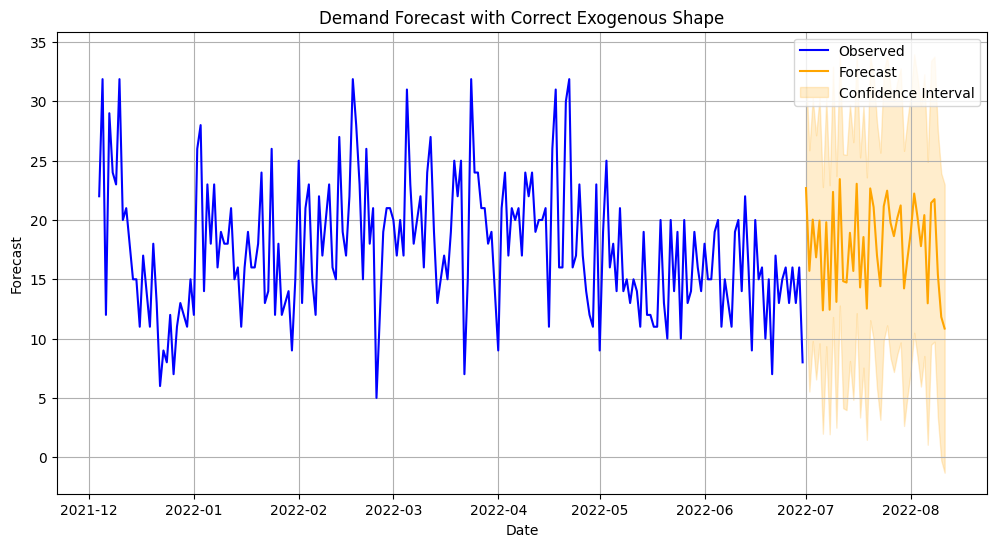

In [255]:
#forecasting using sarimax
expected_shape = (42, 6)  
if X_test.shape != expected_shape:
    print(f"Adjusting exogenous data shape. Required shape: {expected_shape}, got: {X_test.shape}")
    X_forecast = X_test.iloc[:, :expected_shape[1]]  # Use only the required number of columns
else:
    X_forecast = X_test

# Check if X_forecast has the correct shape
print(f"Adjusted exogenous data shape: {X_forecast.shape}")

# Generate the forecast
forecast_steps = expected_shape[0]  # Number of rows required for forecast
forecast = sarimax_result.get_forecast(steps=forecast_steps, exog=X_forecast)

# Extract predicted mean and confidence intervals
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Print forecasted values (optional)
print("Forecasted Values:")
print(forecast_mean)

plt.figure(figsize=(12, 6))
plt.plot(y.index, y, label="Observed", color="blue")

# Generate future dates for the forecast
future_dates = pd.date_range(start=y.index[-1], periods=forecast_steps + 1, freq='D')[1:]

# Plot the forecasted values
plt.plot(future_dates, forecast_mean, label="Forecast", color="orange")

# Plot confidence intervals
plt.fill_between(
    future_dates,
    forecast_conf_int.iloc[:, 0],  # Lower bound
    forecast_conf_int.iloc[:, 1],  # Upper bound
    color="orange",
    alpha=0.2,
    label="Confidence Interval",
)

# Add labels, title, and legend
plt.xlabel("Date")
plt.ylabel("Forecast")
plt.title("Demand Forecast with Correct Exogenous Shape")
plt.legend()
plt.grid()
plt.show()
